<a href="https://colab.research.google.com/github/SarkarPriyanshu/Machine-Learning-Models/blob/main/Logistic_Regession_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp 


from sklearn.model_selection import train_test_split


pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [86]:
df =  pd.read_csv('/content/Hotel Reservations.csv')

## Basic Analysis

In [87]:
df = df.drop('Booking_ID',axis=1)

In [88]:
df['booking_status'].value_counts() / df.shape[0] * 100

Not_Canceled    67.236389
Canceled        32.763611
Name: booking_status, dtype: float64

In [89]:
df['booking_status'] = df['booking_status'].map({'Not_Canceled':1,'Canceled':0})

In [90]:
df.shape

(36275, 18)

In [91]:
df.sample(5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
7887,2,0,0,4,Meal Plan 1,0,Room_Type 1,178,2018,8,10,Online,0,0,0,99.45,1,1
13764,2,0,3,7,Meal Plan 1,0,Room_Type 4,240,2018,8,19,Online,0,0,0,99.45,1,0
28007,2,0,1,2,Meal Plan 1,0,Room_Type 1,305,2018,11,4,Offline,0,0,0,89.00,0,0
20914,2,0,0,4,Not Selected,0,Room_Type 1,31,2018,8,30,Online,0,0,0,99.00,0,0
15353,2,0,0,2,Meal Plan 2,0,Room_Type 1,0,2017,8,14,Offline,0,0,0,109.00,0,1


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [93]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [94]:
df.duplicated().sum()

10275

In [95]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655,0.672364
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236,0.469358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000,1.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [96]:
df.corr()['booking_status']

no_of_adults                           -0.086920
no_of_children                         -0.033078
no_of_weekend_nights                   -0.061563
no_of_week_nights                      -0.092996
required_car_parking_space              0.086185
lead_time                              -0.438538
arrival_year                           -0.179529
arrival_month                           0.011233
arrival_date                           -0.010629
repeated_guest                          0.107287
no_of_previous_cancellations            0.033728
no_of_previous_bookings_not_canceled    0.060179
avg_price_per_room                     -0.142569
no_of_special_requests                  0.253070
booking_status                          1.000000
Name: booking_status, dtype: float64

In [97]:
df.cov()['booking_status']

no_of_adults                            -0.021162
no_of_children                          -0.006251
no_of_weekend_nights                    -0.025157
no_of_week_nights                       -0.061584
required_car_parking_space               0.007010
lead_time                              -17.687243
arrival_year                            -0.032343
arrival_month                            0.016185
arrival_date                            -0.043605
repeated_guest                           0.007959
no_of_previous_cancellations             0.005831
no_of_previous_bookings_not_canceled     0.049548
avg_price_per_room                      -2.348045
no_of_special_requests                   0.093389
booking_status                           0.220297
Name: booking_status, dtype: float64

In [98]:
df.var()

no_of_adults                               0.269065
no_of_children                             0.162125
no_of_weekend_nights                       0.758020
no_of_week_nights                          1.990653
required_car_parking_space                 0.030026
lead_time                               7384.105259
arrival_year                               0.147330
arrival_month                              9.424252
arrival_date                              76.395420
repeated_guest                             0.024981
no_of_previous_cancellations               0.135668
no_of_previous_bookings_not_canceled       3.077115
avg_price_per_room                      1231.267679
no_of_special_requests                     0.618167
booking_status                             0.220297
dtype: float64

## EDA

In [99]:
numericFeature = []
categoricalFeature = []
for feature in df.columns:
  if df[feature].dtype == 'float64' or df[feature].dtype == 'int64':
    numericFeature.append(feature)
  else:
    categoricalFeature.append(feature)

In [100]:
categoricalFeature

['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

### Univarient Analysis

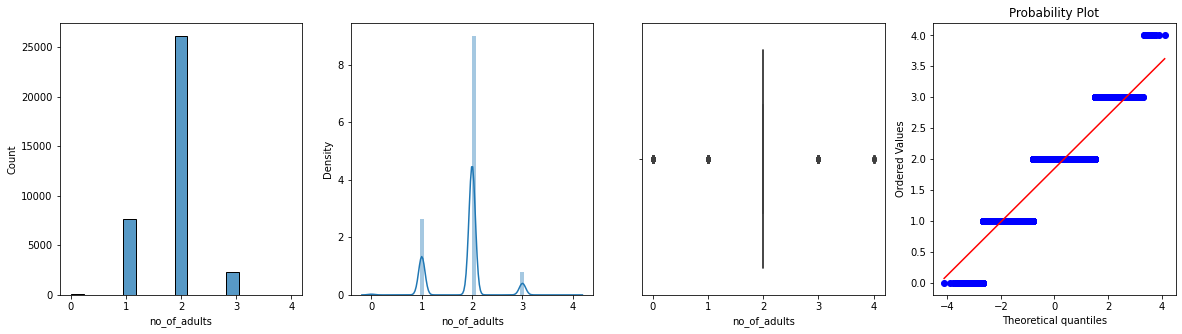

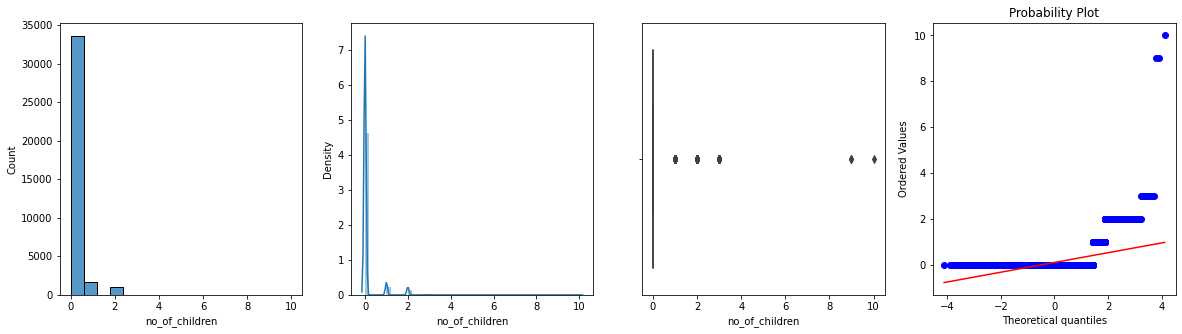

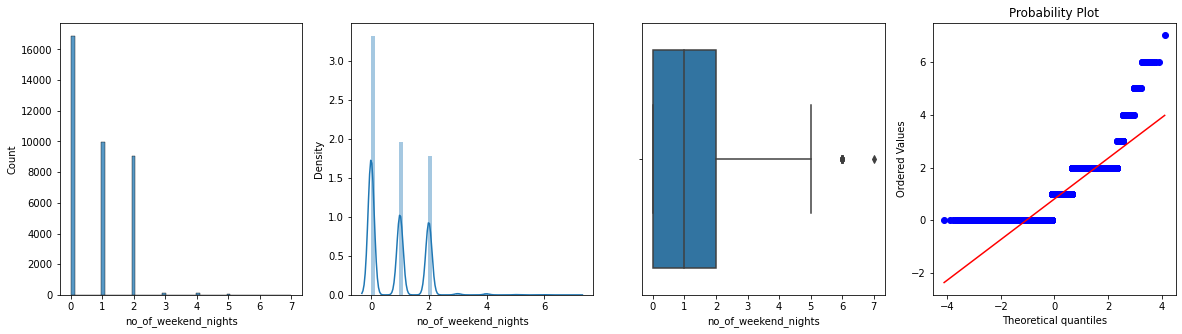

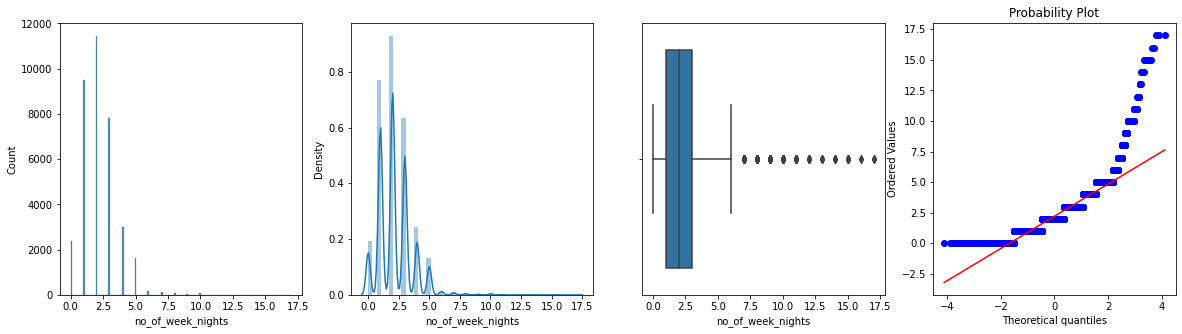

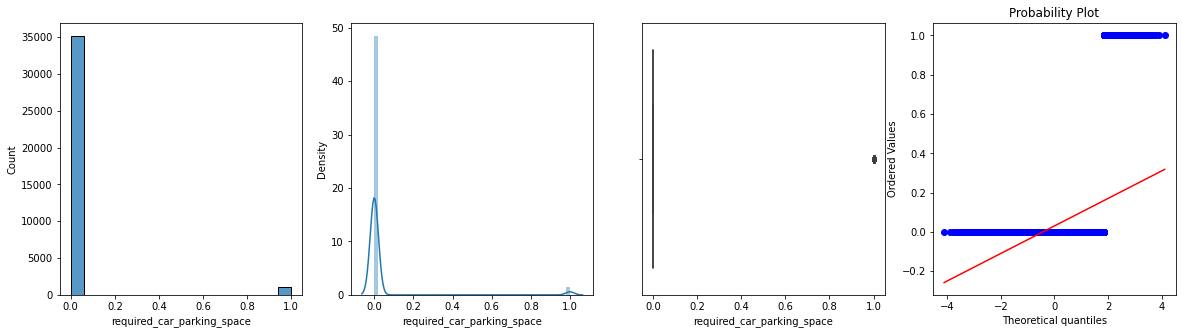

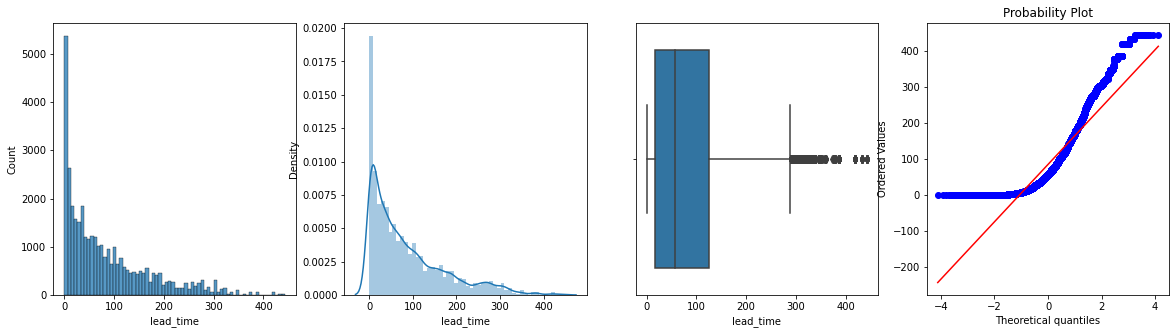

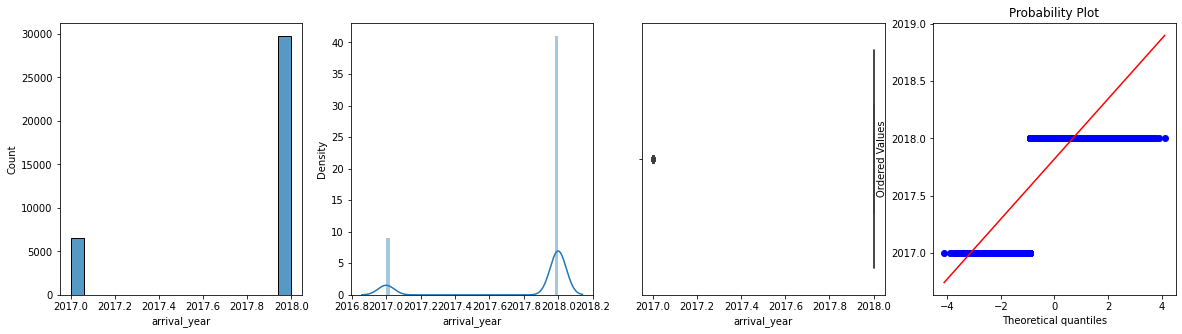

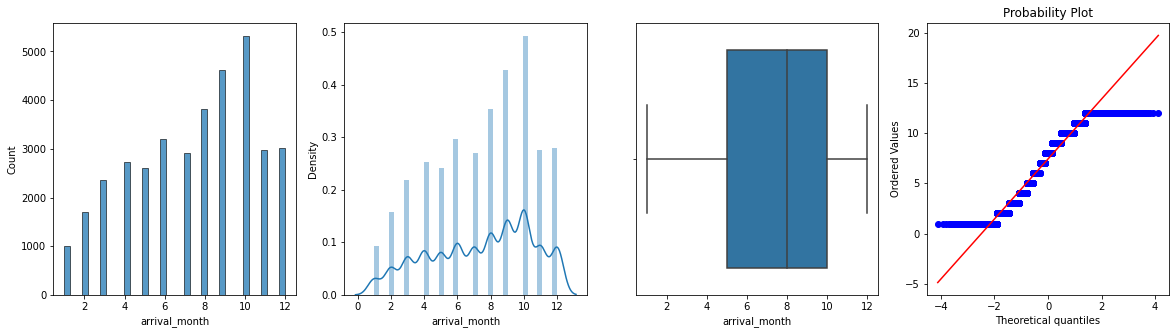

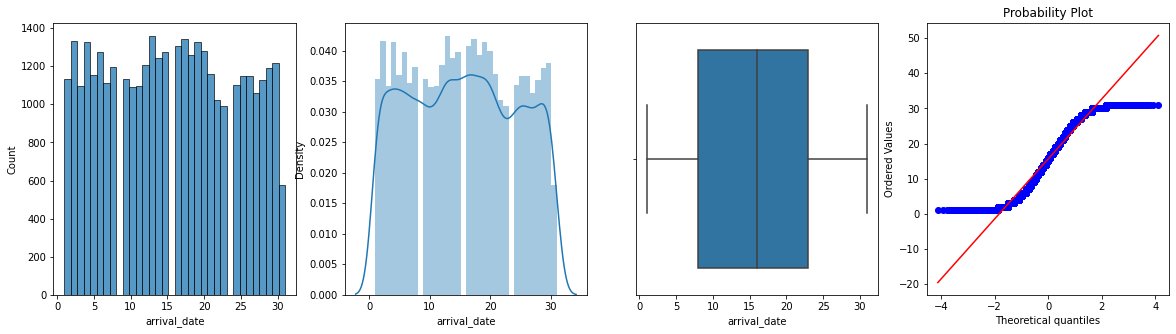

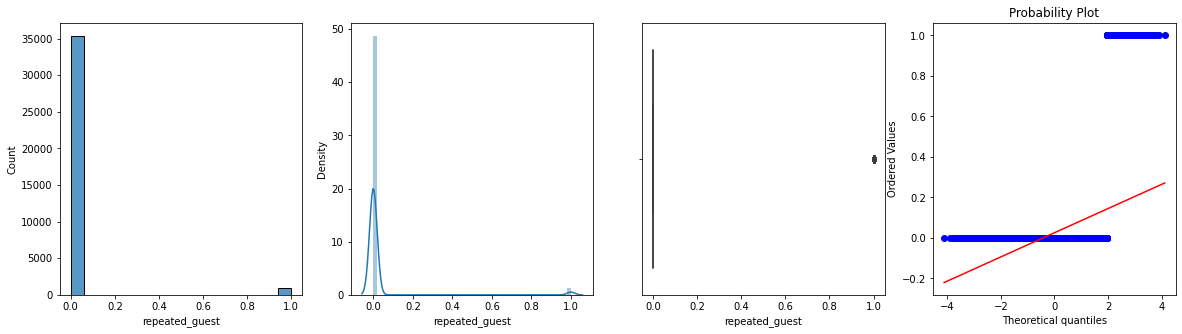

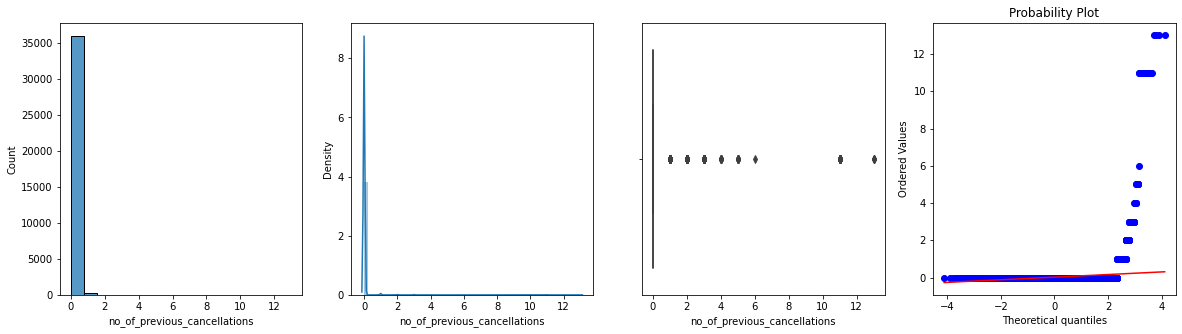

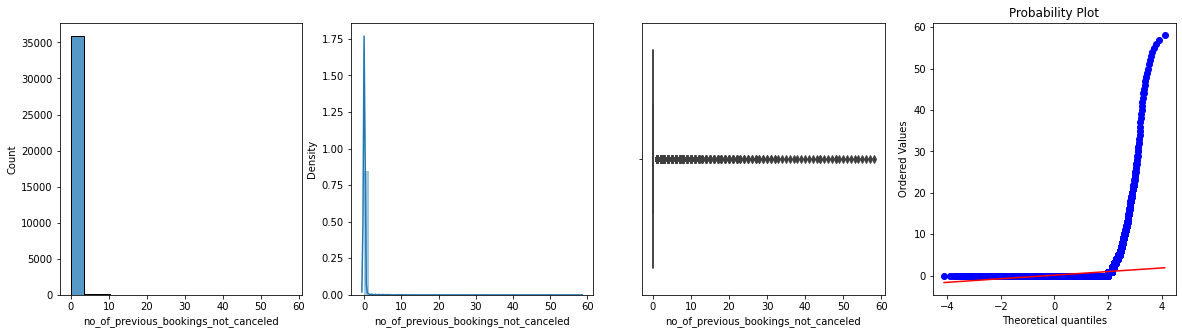

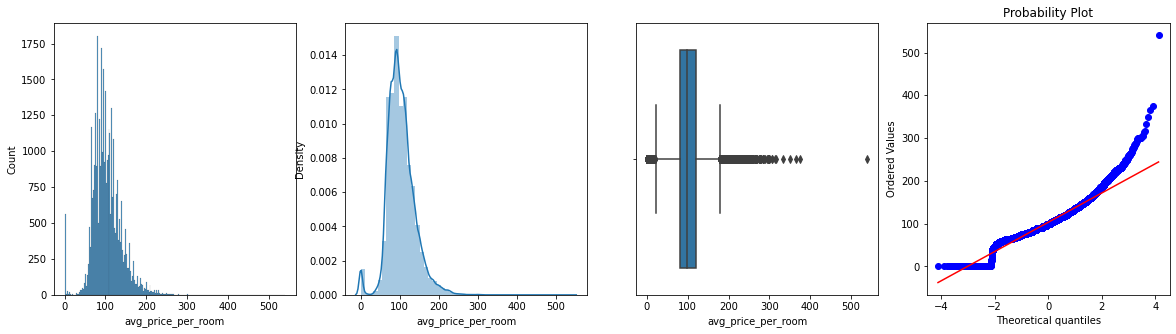

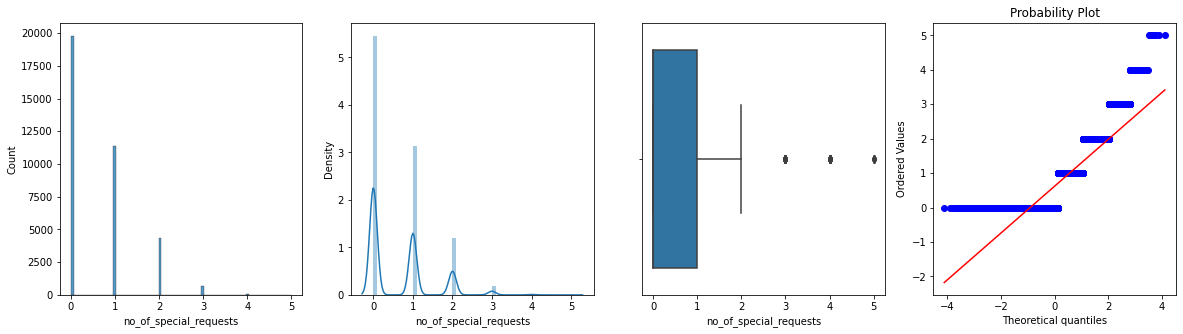

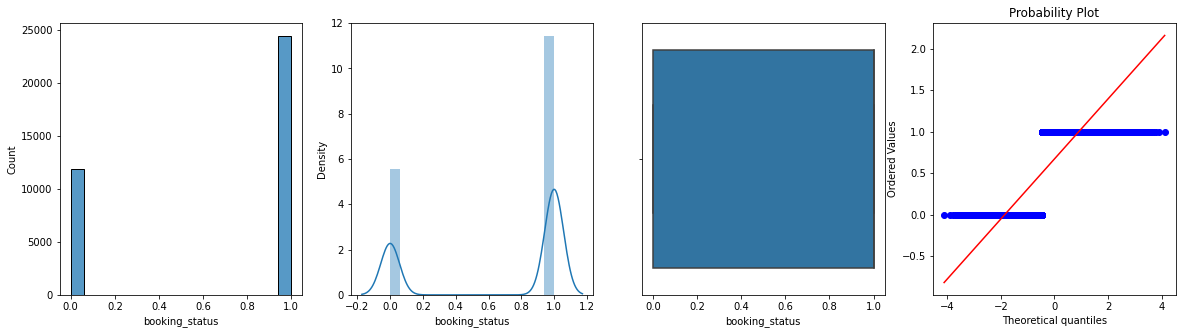

In [101]:
for feature in numericFeature:
  fig, ax = plt.subplots(1,4,figsize=(20, 5))
  sns.histplot(df[feature], ax=ax[0])
  sns.distplot(df[feature], ax=ax[1])
  sns.boxplot(df[feature],ax=ax[2])
  sp.probplot(df[feature], plot=ax[3], fit=True)
  fig.show()

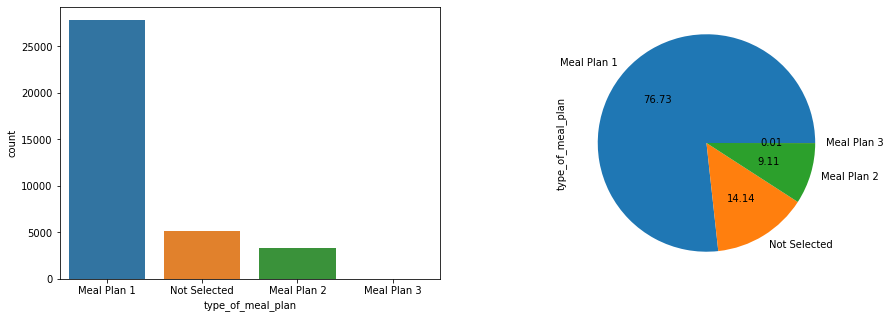

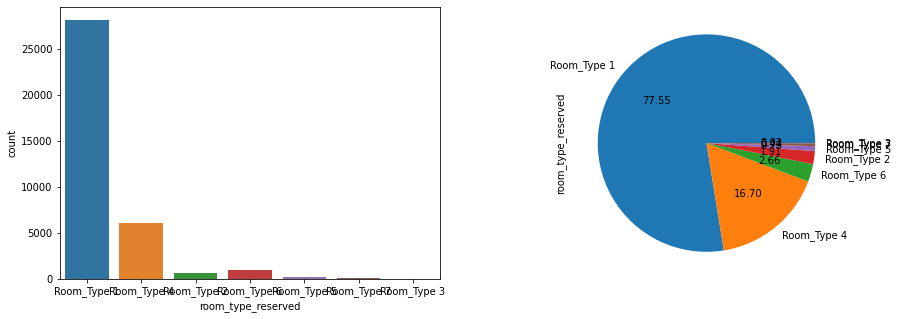

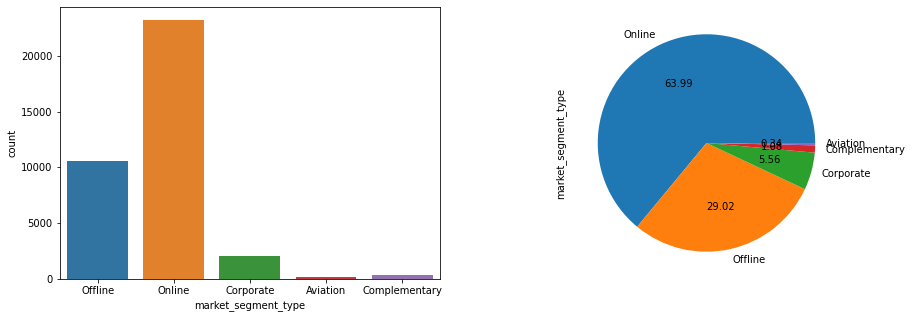

In [102]:
for feature in categoricalFeature:
  fig, ax = plt.subplots(1,2,figsize=(15, 5))
  sns.countplot(df[feature], ax=ax[0])
  df[feature].value_counts().plot(kind='pie',autopct='%.2f')
  fig.show()

### Bivarient Analaysis

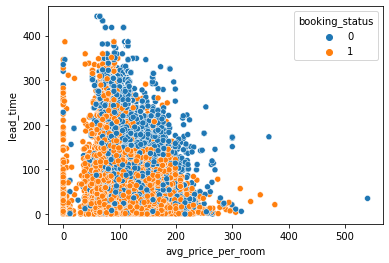

In [103]:
sns.scatterplot(df['avg_price_per_room'],df['lead_time'],hue=df['booking_status'])

<bound method Figure.show of <Figure size 1440x360 with 2 Axes>>

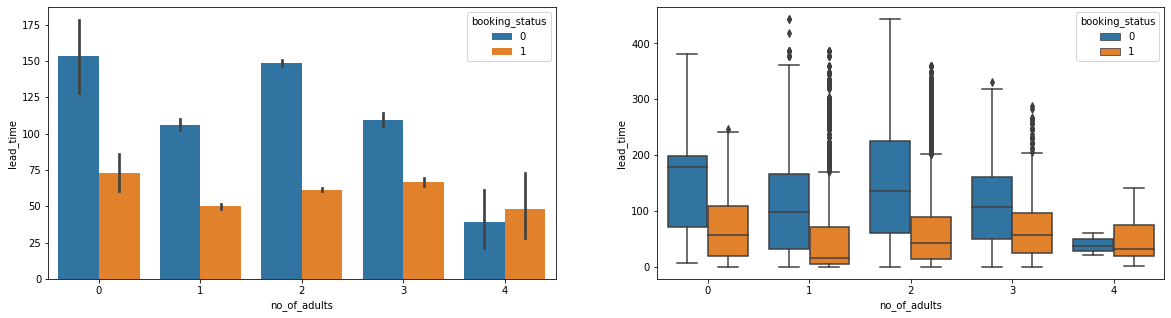

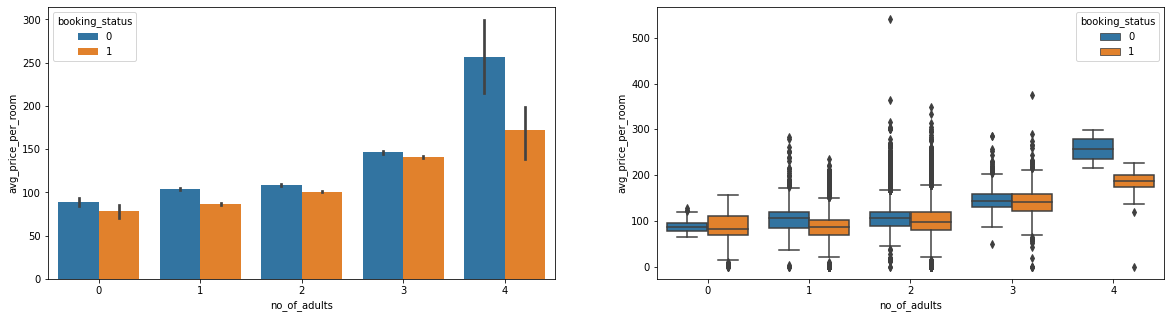

In [104]:
fig, ax = plt.subplots(1,2,figsize=(20, 5))
sns.barplot(df['no_of_adults'],df['lead_time'],hue=df['booking_status'],ax=ax[0])
sns.boxplot(df['no_of_adults'],df['lead_time'],hue=df['booking_status'],ax=ax[1])
fig.show

fig, ax = plt.subplots(1,2,figsize=(20, 5))
sns.barplot(df['no_of_adults'],df['avg_price_per_room'],hue=df['booking_status'],ax=ax[0])
sns.boxplot(df['no_of_adults'],df['avg_price_per_room'],hue=df['booking_status'],ax=ax[1])
fig.show


<bound method Figure.show of <Figure size 1440x360 with 2 Axes>>

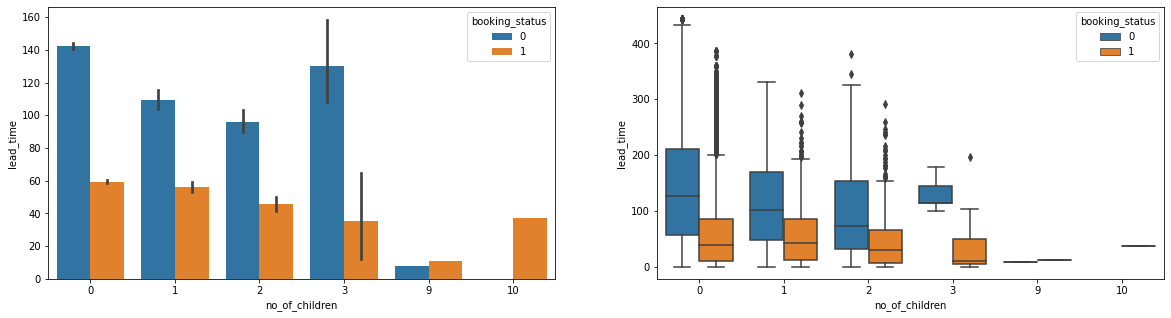

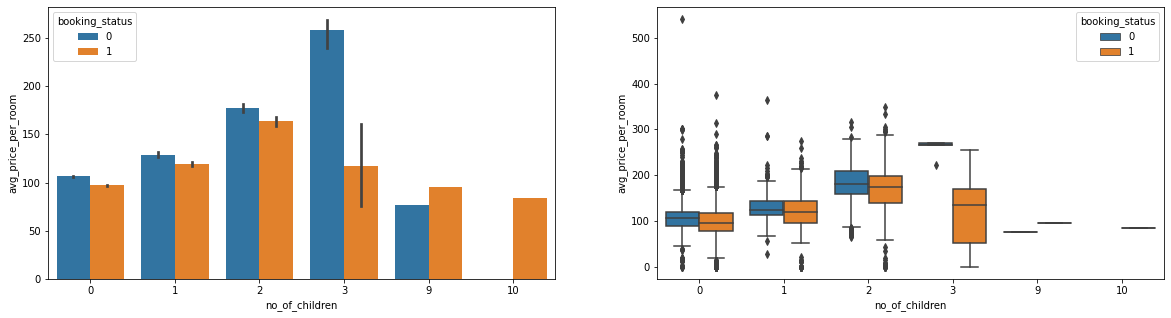

In [105]:
fig, ax = plt.subplots(1,2,figsize=(20, 5))
sns.barplot(df['no_of_children'],df['lead_time'],hue=df['booking_status'],ax=ax[0])
sns.boxplot(df['no_of_children'],df['lead_time'],hue=df['booking_status'],ax=ax[1])
fig.show

fig, ax = plt.subplots(1,2,figsize=(20, 5))
sns.barplot(df['no_of_children'],df['avg_price_per_room'],hue=df['booking_status'],ax=ax[0])
sns.boxplot(df['no_of_children'],df['avg_price_per_room'],hue=df['booking_status'],ax=ax[1])
fig.show

<bound method Figure.show of <Figure size 1440x360 with 2 Axes>>

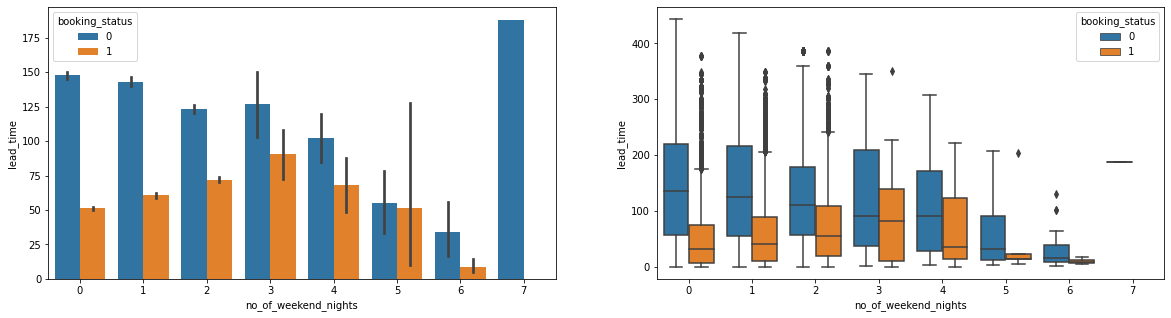

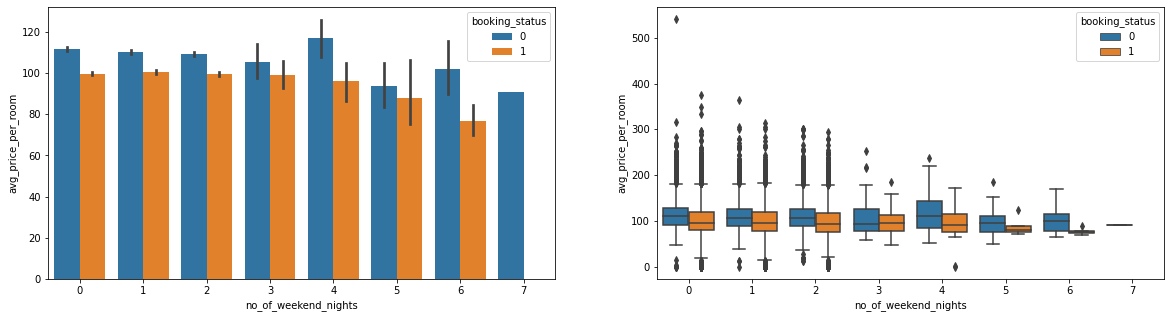

In [106]:
fig, ax = plt.subplots(1,2,figsize=(20, 5))
sns.barplot(df['no_of_weekend_nights'],df['lead_time'],hue=df['booking_status'],ax=ax[0])
sns.boxplot(df['no_of_weekend_nights'],df['lead_time'],hue=df['booking_status'],ax=ax[1])
fig.show

fig, ax = plt.subplots(1,2,figsize=(20, 5))
sns.barplot(df['no_of_weekend_nights'],df['avg_price_per_room'],hue=df['booking_status'],ax=ax[0])
sns.boxplot(df['no_of_weekend_nights'],df['avg_price_per_room'],hue=df['booking_status'],ax=ax[1])
fig.show

<bound method Figure.show of <Figure size 1440x360 with 2 Axes>>

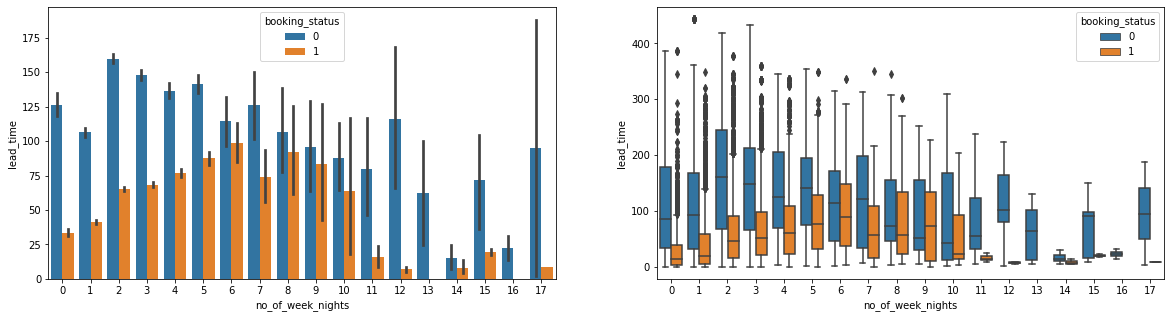

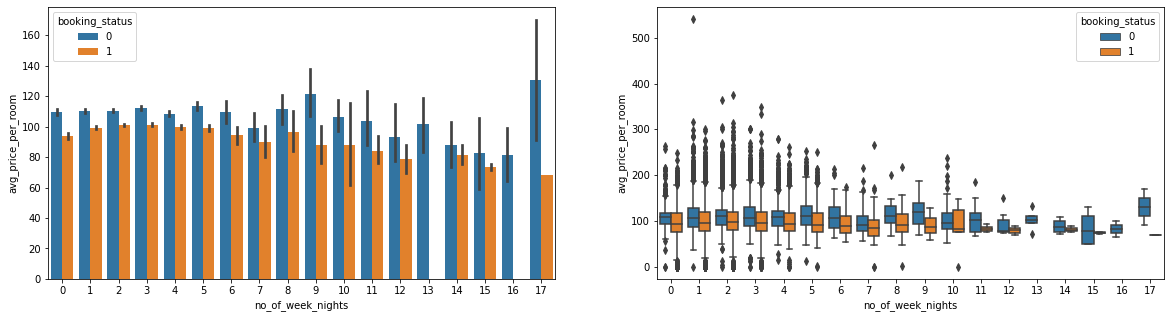

In [107]:
fig, ax = plt.subplots(1,2,figsize=(20, 5))
sns.barplot(df['no_of_week_nights'],df['lead_time'],hue=df['booking_status'],ax=ax[0])
sns.boxplot(df['no_of_week_nights'],df['lead_time'],hue=df['booking_status'],ax=ax[1])
fig.show

fig, ax = plt.subplots(1,2,figsize=(20, 5))
sns.barplot(df['no_of_week_nights'],df['avg_price_per_room'],hue=df['booking_status'],ax=ax[0])
sns.boxplot(df['no_of_week_nights'],df['avg_price_per_room'],hue=df['booking_status'],ax=ax[1])
fig.show

<bound method Figure.show of <Figure size 1440x360 with 2 Axes>>

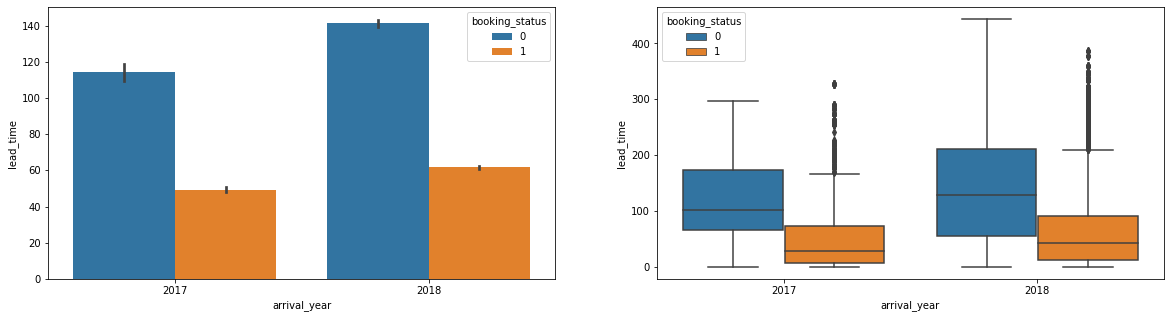

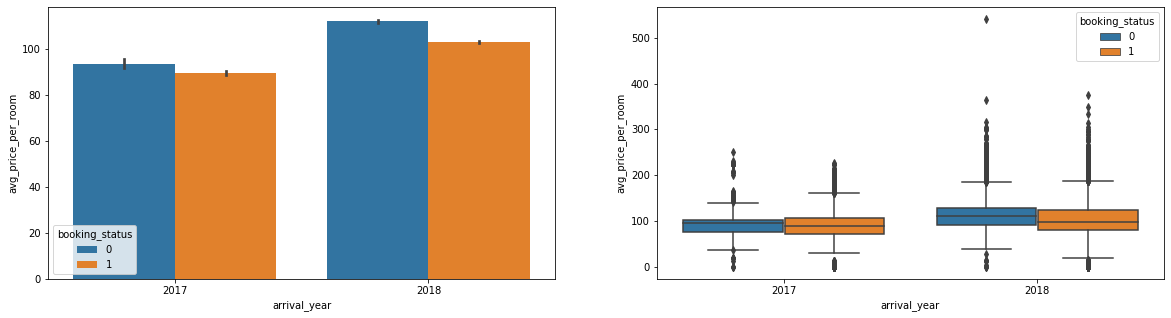

In [108]:
fig, ax = plt.subplots(1,2,figsize=(20, 5))
sns.barplot(df['arrival_year'],df['lead_time'],hue=df['booking_status'],ax=ax[0])
sns.boxplot(df['arrival_year'],df['lead_time'],hue=df['booking_status'],ax=ax[1])
fig.show

fig, ax = plt.subplots(1,2,figsize=(20, 5))
sns.barplot(df['arrival_year'],df['avg_price_per_room'],hue=df['booking_status'],ax=ax[0])
sns.boxplot(df['arrival_year'],df['avg_price_per_room'],hue=df['booking_status'],ax=ax[1])
fig.show

<bound method Figure.show of <Figure size 1440x360 with 2 Axes>>

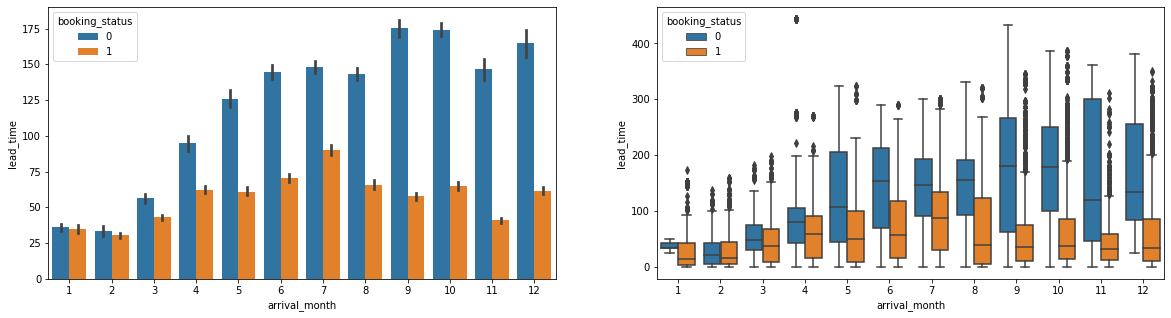

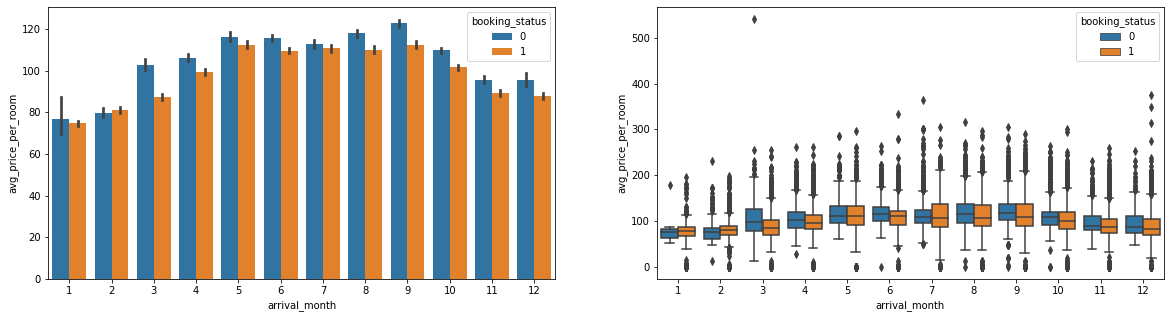

In [109]:
fig, ax = plt.subplots(1,2,figsize=(20, 5))
sns.barplot(df['arrival_month'],df['lead_time'],hue=df['booking_status'],ax=ax[0])
sns.boxplot(df['arrival_month'],df['lead_time'],hue=df['booking_status'],ax=ax[1])
fig.show

fig, ax = plt.subplots(1,2,figsize=(20, 5))
sns.barplot(df['arrival_month'],df['avg_price_per_room'],hue=df['booking_status'],ax=ax[0])
sns.boxplot(df['arrival_month'],df['avg_price_per_room'],hue=df['booking_status'],ax=ax[1])
fig.show

<bound method Figure.show of <Figure size 1440x360 with 2 Axes>>

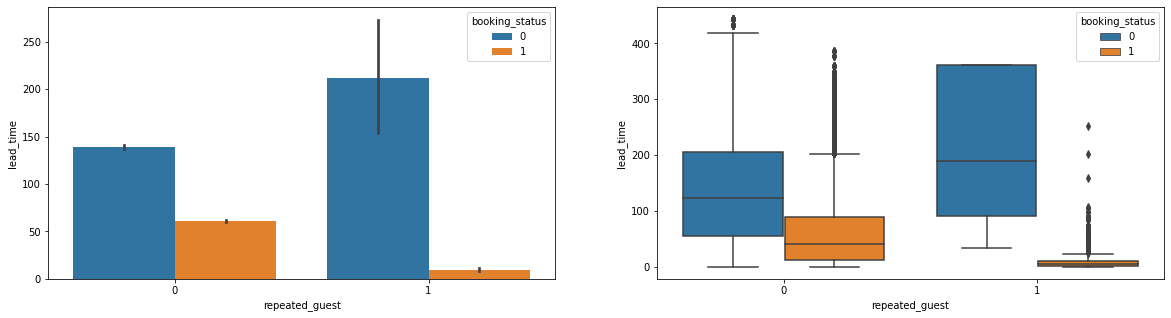

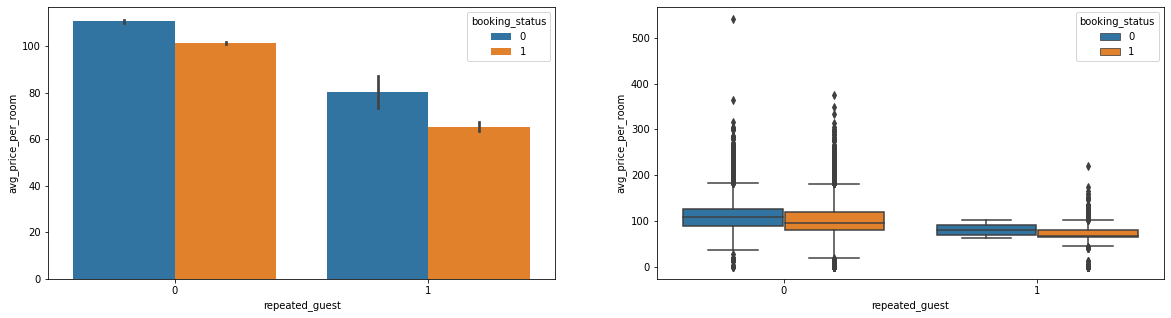

In [110]:
fig, ax = plt.subplots(1,2,figsize=(20, 5))
sns.barplot(df['repeated_guest'],df['lead_time'],hue=df['booking_status'],ax=ax[0])
sns.boxplot(df['repeated_guest'],df['lead_time'],hue=df['booking_status'],ax=ax[1])
fig.show

fig, ax = plt.subplots(1,2,figsize=(20, 5))
sns.barplot(df['repeated_guest'],df['avg_price_per_room'],hue=df['booking_status'],ax=ax[0])
sns.boxplot(df['repeated_guest'],df['avg_price_per_room'],hue=df['booking_status'],ax=ax[1])
fig.show

<bound method Figure.show of <Figure size 1440x360 with 2 Axes>>

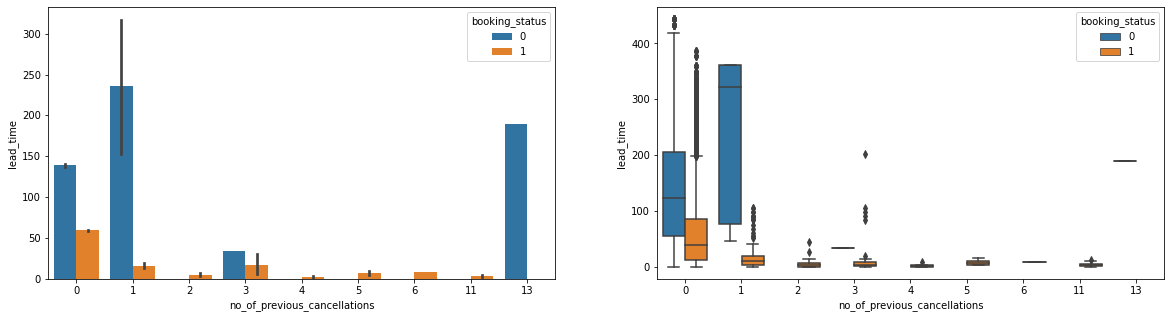

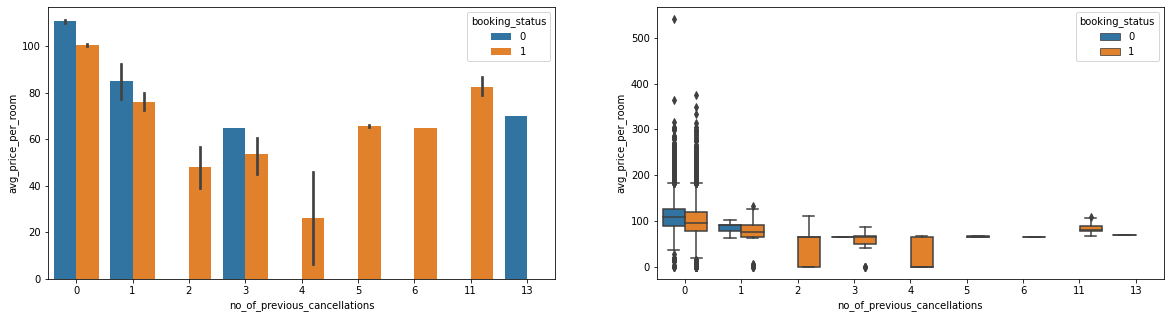

In [111]:
fig, ax = plt.subplots(1,2,figsize=(20, 5))
sns.barplot(df['no_of_previous_cancellations'],df['lead_time'],hue=df['booking_status'],ax=ax[0])
sns.boxplot(df['no_of_previous_cancellations'],df['lead_time'],hue=df['booking_status'],ax=ax[1])
fig.show

fig, ax = plt.subplots(1,2,figsize=(20, 5))
sns.barplot(df['no_of_previous_cancellations'],df['avg_price_per_room'],hue=df['booking_status'],ax=ax[0])
sns.boxplot(df['no_of_previous_cancellations'],df['avg_price_per_room'],hue=df['booking_status'],ax=ax[1])
fig.show

<bound method Figure.show of <Figure size 1440x360 with 2 Axes>>

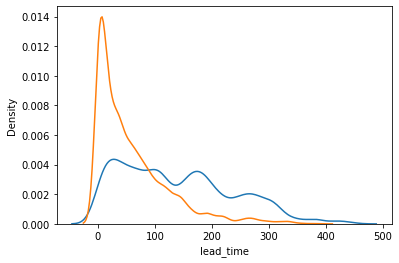

In [112]:
sns.distplot(df[df['booking_status']==0]['lead_time'],hist=False)
sns.distplot(df[df['booking_status']==1]['lead_time'],hist=False)
fig.show

<bound method Figure.show of <Figure size 1440x360 with 2 Axes>>

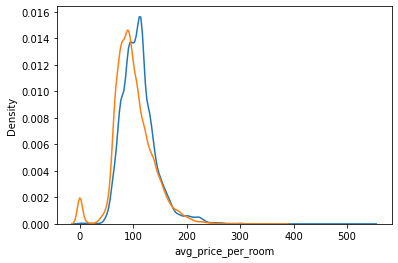

In [113]:
sns.distplot(df[df['booking_status']==0]['avg_price_per_room'],hist=False)
sns.distplot(df[df['booking_status']==1]['avg_price_per_room'],hist=False)
fig.show

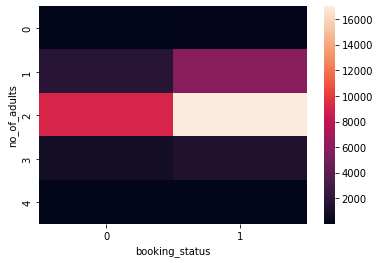

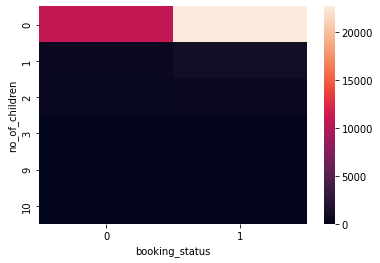

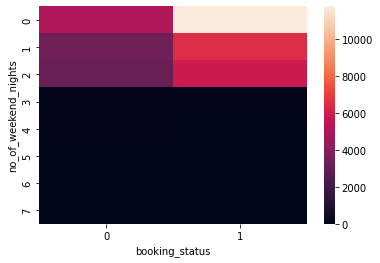

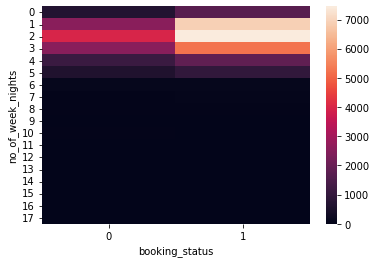

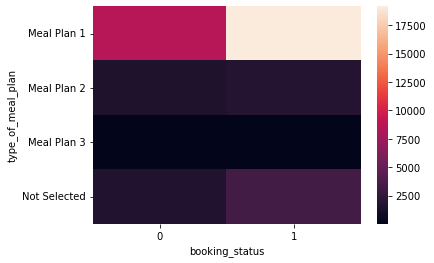

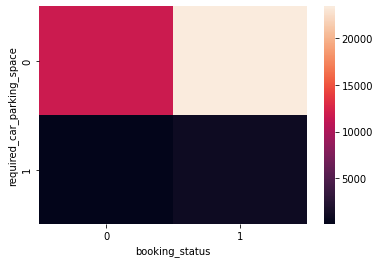

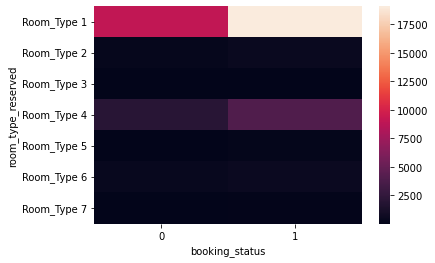

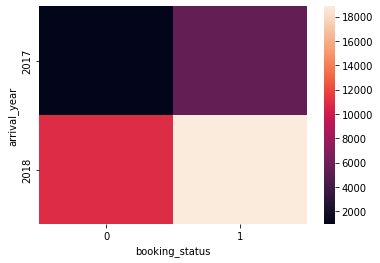

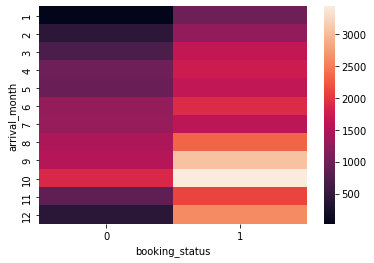

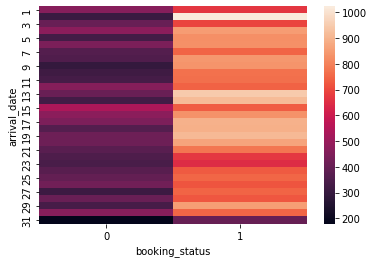

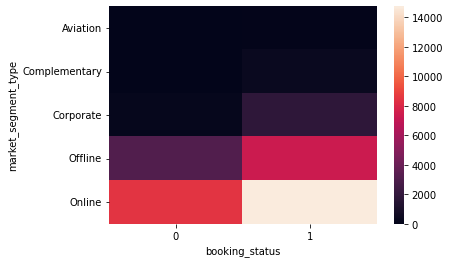

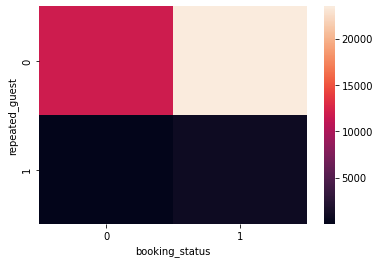

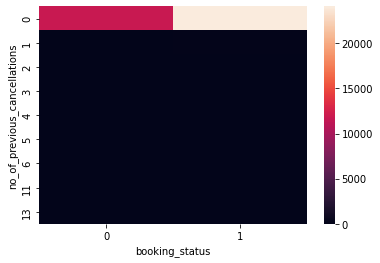

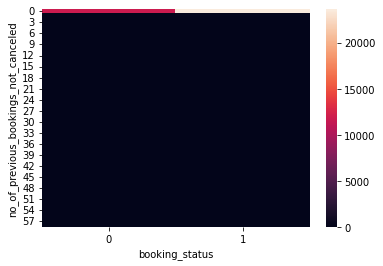

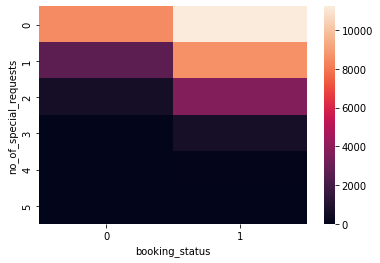

In [114]:
for feature in ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
        'no_of_special_requests']:
        sns.heatmap(pd.crosstab(df[feature],df['booking_status']))
        plt.show()

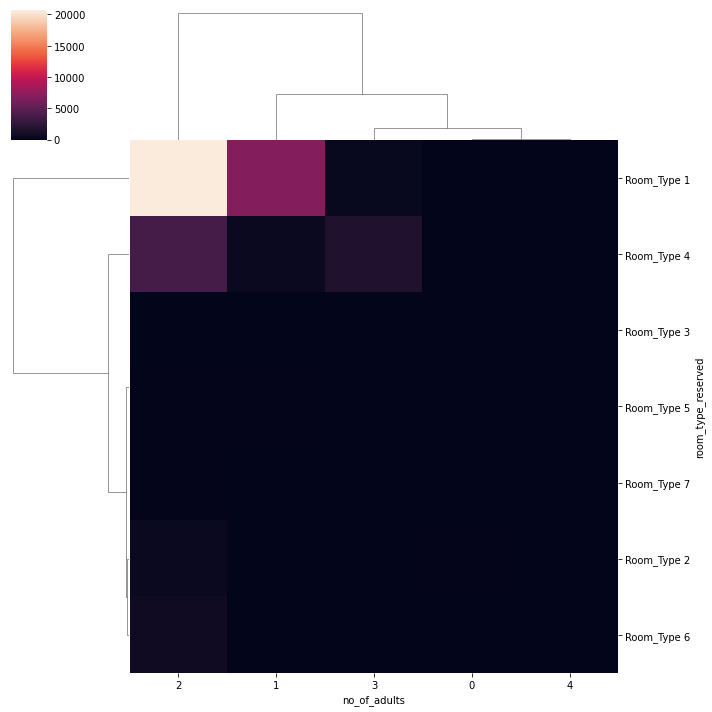

In [115]:
sns.clustermap(pd.crosstab(df['room_type_reserved'],df['no_of_adults']))

In [116]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

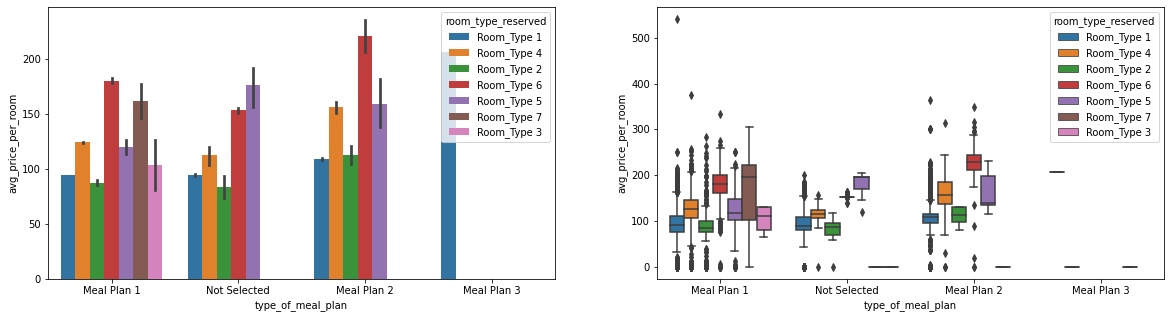

In [117]:
fig, ax = plt.subplots(1,2,figsize=(20, 5))
sns.barplot(df['type_of_meal_plan'],df['avg_price_per_room'],hue=df['room_type_reserved'],ax=ax[0])
sns.boxplot(df['type_of_meal_plan'],df['avg_price_per_room'],hue=df['room_type_reserved'],ax=ax[1])

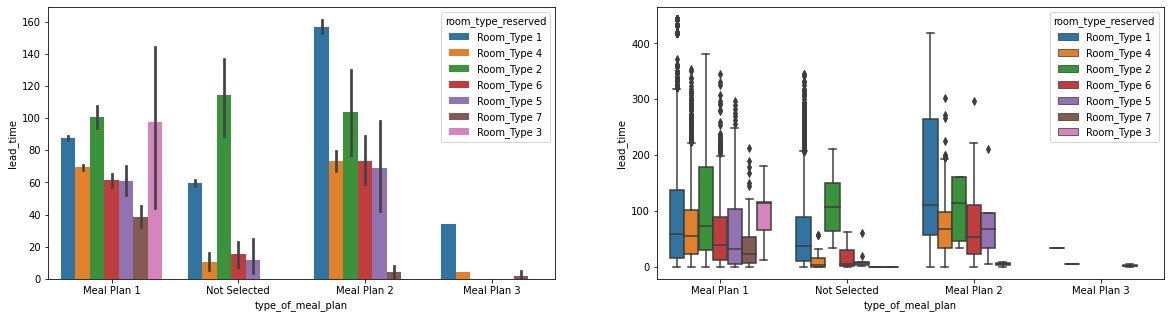

In [118]:
fig, ax = plt.subplots(1,2,figsize=(20, 5))
sns.barplot(df['type_of_meal_plan'],df['lead_time'],hue=df['room_type_reserved'],ax=ax[0])
sns.boxplot(df['type_of_meal_plan'],df['lead_time'],hue=df['room_type_reserved'],ax=ax[1])

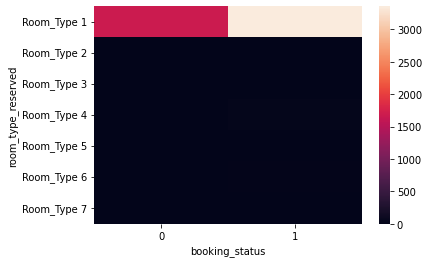

In [126]:
sns.heatmap(pd.crosstab(df.loc[df['type_of_meal_plan'] == 'Not Selected']['room_type_reserved'],df.loc[df['type_of_meal_plan'] == 'Not Selected']['booking_status']))

In [ ]:
df['market_segment_type']

## Preprocessing

### Handling categorical Encoding

In [141]:
numericFeature


['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'booking_status']

In [131]:
df['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [130]:
df['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [128]:
df['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [133]:
ne_hot_encoded_df = pd.get_dummies(df, columns = ['market_segment_type', 'room_type_reserved','type_of_meal_plan'],drop_first=True)

In [137]:
X = ne_hot_encoded_df.drop('booking_status',axis=1)
y= ne_hot_encoded_df['booking_status']

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [140]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24304, 27), (11971, 27), (24304,), (11971,))

### Feature Transformation

7384.105258597107 160.30030824400114 Exponantial variance
7384.105258597107 22.403453577354828 Square root variance
7384.105258597107 13.768235413101232 yojohnson variance
1231.267679204206 27.512355664844932 Exponantial variance
1231.267679204206 3.933150419125549 Square root variance
1231.267679204206 322.7880227917323 yojohnson variance


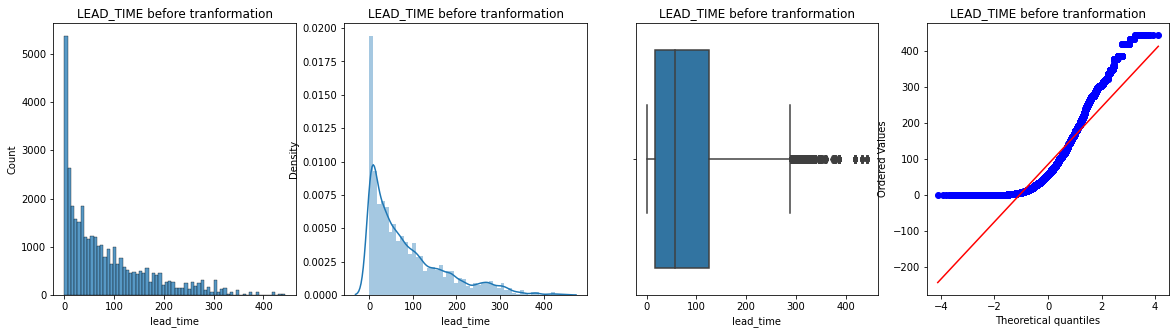

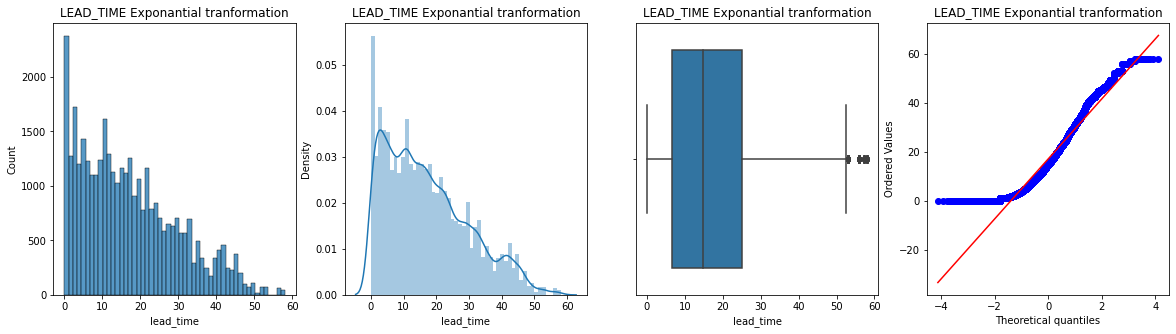

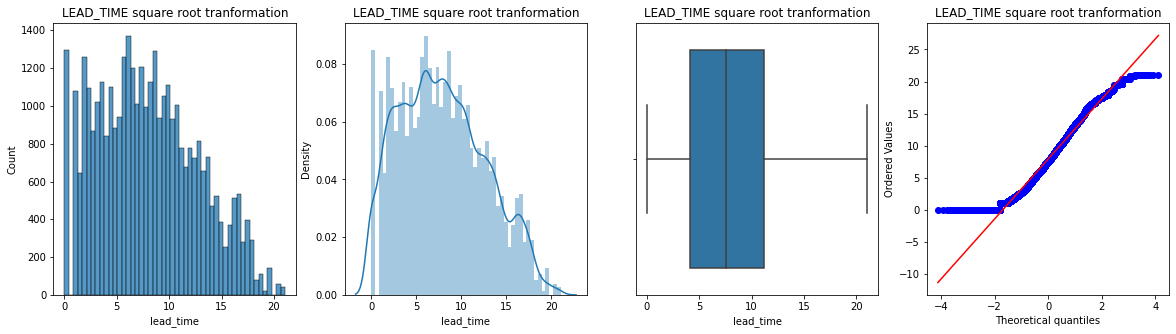

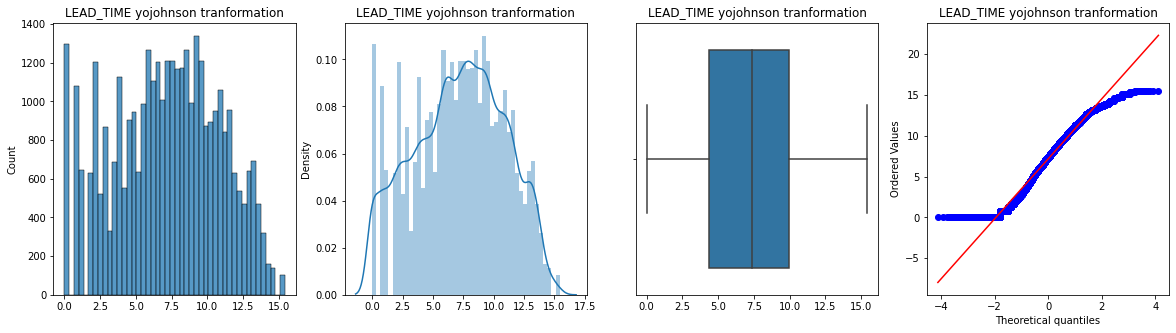

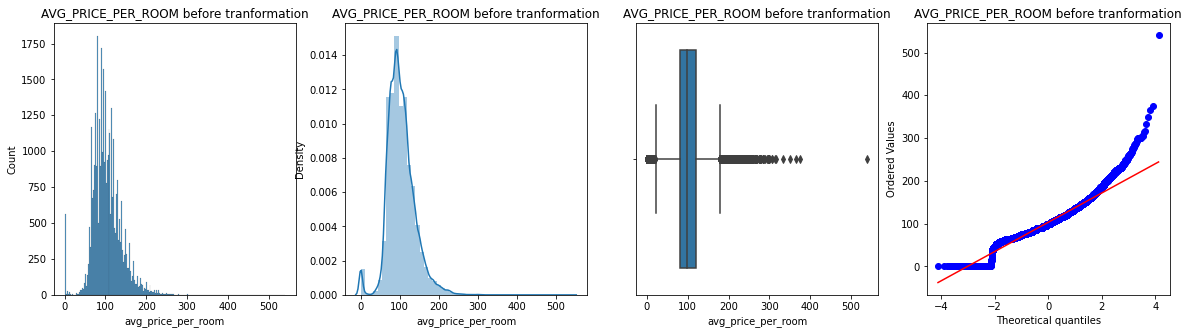

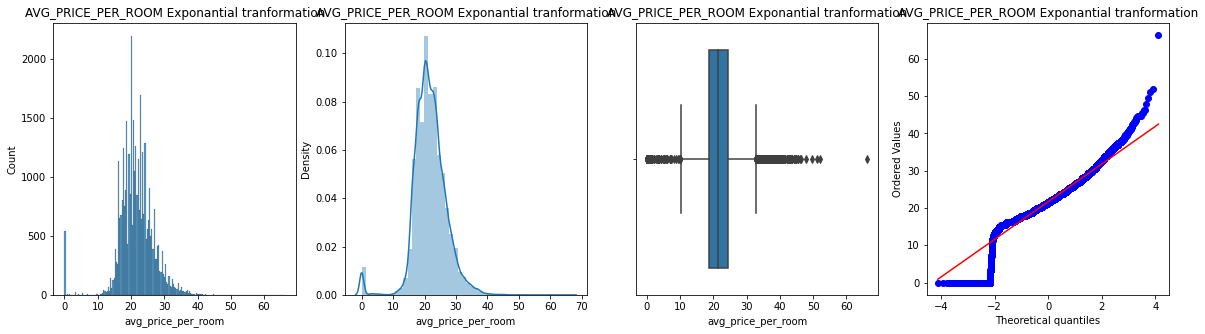

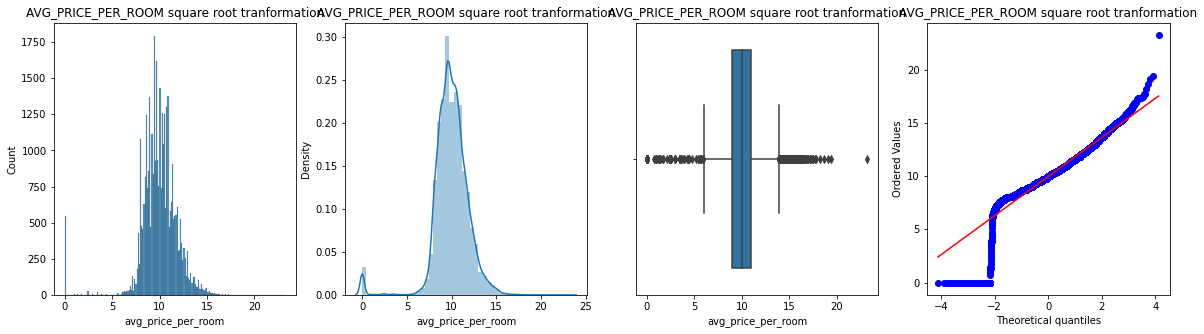

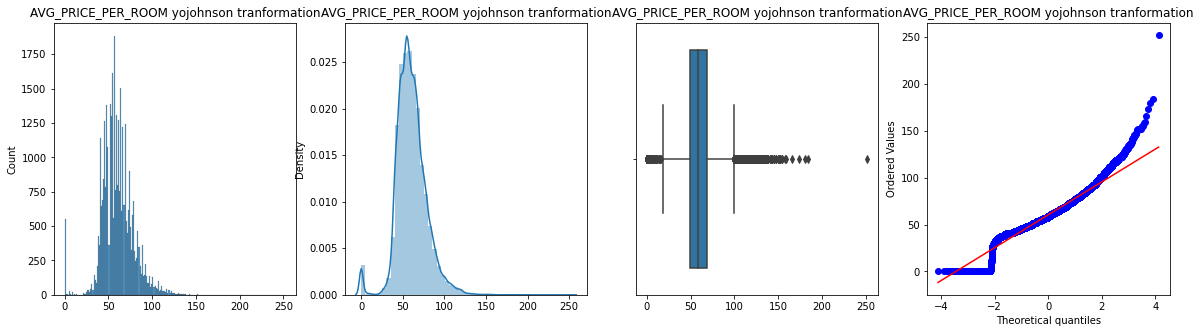

In [151]:
for feature in ['lead_time','avg_price_per_room']:
  fig, ax = plt.subplots(1,4,figsize=(20, 5))
  sns.histplot(df[feature], ax=ax[0]).set(title=f'{feature.upper()} before tranformation')
  sns.distplot(df[feature], ax=ax[1]).set(title=f'{feature.upper()} before tranformation')
  sns.boxplot(df[feature],ax=ax[2]).set(title=f'{feature.upper()} before tranformation')
  sp.probplot(df[feature], dist="norm", plot=plt)
  plt.title(f'{feature.upper()} before tranformation')
  fig.show()


  print(df[feature].var(),np.var((df[feature])**(1/1.5)),'Exponantial variance')
  fig, ax = plt.subplots(1,4,figsize=(20, 5))
  sns.histplot((df[feature])**(1/1.5), ax=ax[0]).set(title=f'{feature.upper()} Exponantial tranformation')
  sns.distplot((df[feature])**(1/1.5), ax=ax[1]).set(title=f'{feature.upper()} Exponantial tranformation')
  sns.boxplot((df[feature])**(1/1.5),ax=ax[2]).set(title=f'{feature.upper()} Exponantial tranformation')
  sp.probplot((df[feature])**(1/1.5), dist="norm", plot=plt)
  plt.title(f'{feature.upper()} Exponantial tranformation')
  fig.show()


  print(df[feature].var(),np.var((df[feature])**(1/2)),'Square root variance')
  fig, ax = plt.subplots(1,4,figsize=(20, 5))
  sns.histplot((df[feature])**(1/2), ax=ax[0]).set(title=f'{feature.upper()} square root tranformation')
  sns.distplot((df[feature])**(1/2), ax=ax[1]).set(title=f'{feature.upper()} square root tranformation')
  sns.boxplot((df[feature])**(1/2),ax=ax[2]).set(title=f'{feature.upper()} square root tranformation')
  sp.probplot((df[feature])**(1/2), dist="norm", plot=plt)
  plt.title(f'{feature.upper()} square root tranformation')
  fig.show()

  data, param = sp.yeojohnson(df[feature]) 
  print(df[feature].var(),np.var(data),'yojohnson variance')
  fig, ax = plt.subplots(1,4,figsize=(20, 5))
  sns.histplot(data, ax=ax[0]).set(title=f'{feature.upper()} yojohnson tranformation')
  sns.distplot(data, ax=ax[1]).set(title=f'{feature.upper()} yojohnson tranformation')
  sns.boxplot(data,ax=ax[2]).set(title=f'{feature.upper()} yojohnson tranformation')
  sp.probplot(data, dist="norm", plot=plt)
  plt.title(f'{feature.upper()} yojohnson tranformation')
  fig.show()


In [153]:
data, param = sp.yeojohnson(X_train['lead_time']) 
X_train['lead_time'] = data
data, param = sp.yeojohnson(X_test['lead_time']) 
X_test['lead_time'] = data

In [154]:
data = (X_train['avg_price_per_room'])**(1/2)
X_train['avg_price_per_room'] = data
data = (X_test['avg_price_per_room'])**(1/2) 
X_test['avg_price_per_room'] = data

### Outlier Handling

In [160]:
df_testing = df.copy()

In [156]:
def diagnostic_plots(df, feature,stage):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.kdeplot(df[feature])
    plt.title(f'dist {stage}')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    sp.probplot(df[feature], dist="norm", plot=plt)
    plt.ylabel(f'{feature} {stage} quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[feature])
    plt.title(f'{stage} Boxplot')

    plt.show()

In [157]:
# This function find the inter quantile range find the upper bound and lower bound

def handlingOuliersIQR(feature):
    diagnostic_plots(df,feature,'before')
    
    # Finding the IQR
    percentile25 = df[feature].quantile(0.25)
    percentile75 = df[feature].quantile(0.75)
    
    iqr = percentile75 - percentile25
    
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    
    print(f"Upper limit of {feature}",upper_limit)
    print(f"Lower limit of {feature}",lower_limit)
    
    df_testing[feature]= np.where(df_testing[feature] > upper_limit, upper_limit,
                       np.where(df_testing[feature] < lower_limit, lower_limit, df[feature]))
    
    diagnostic_plots(df_testing,feature,'after')

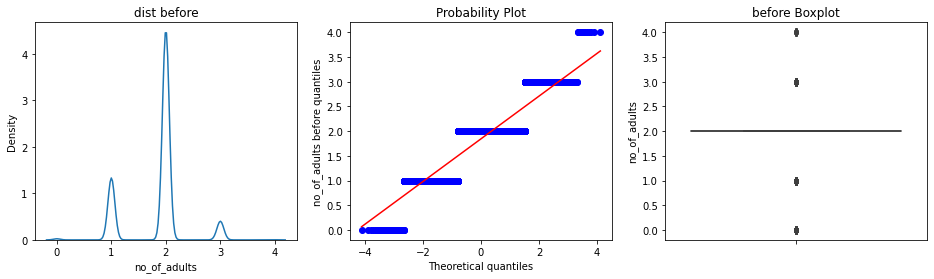

Upper limit of no_of_adults 2.0
Lower limit of no_of_adults 2.0


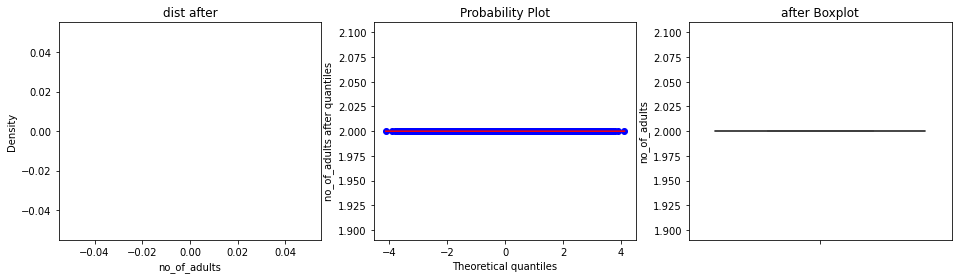

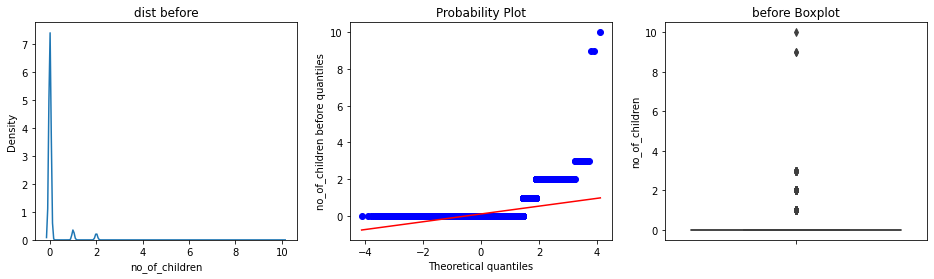

Upper limit of no_of_children 0.0
Lower limit of no_of_children 0.0


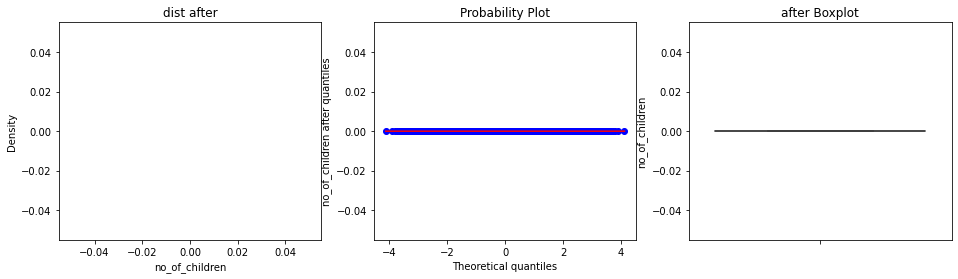

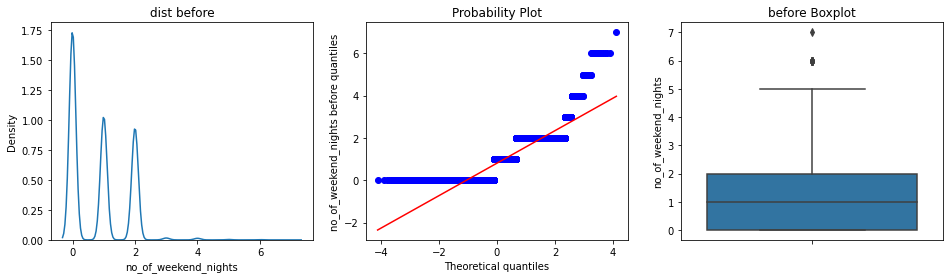

Upper limit of no_of_weekend_nights 5.0
Lower limit of no_of_weekend_nights -3.0


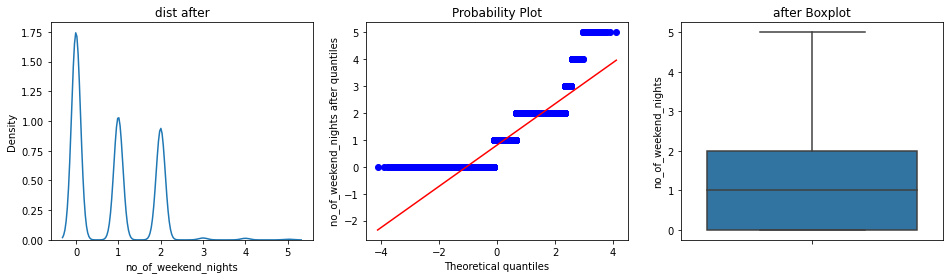

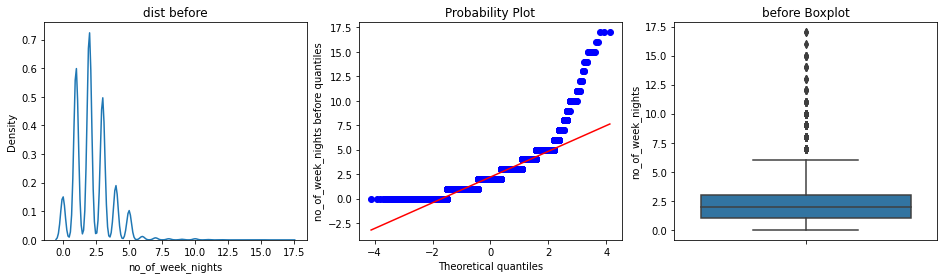

Upper limit of no_of_week_nights 6.0
Lower limit of no_of_week_nights -2.0


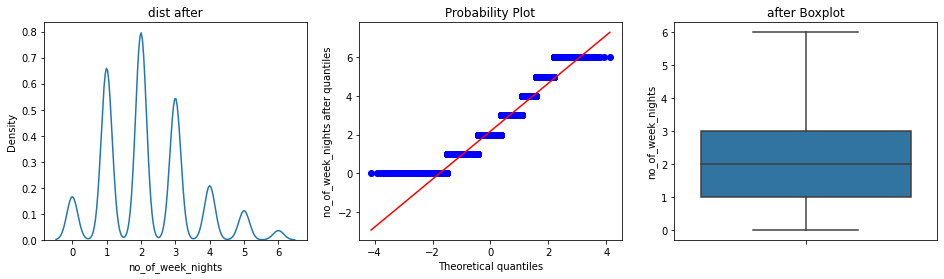

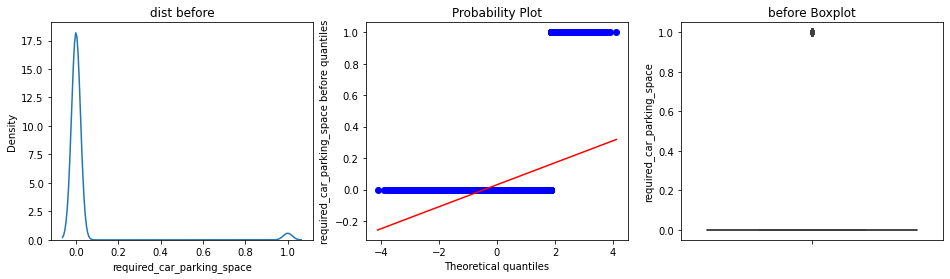

Upper limit of required_car_parking_space 0.0
Lower limit of required_car_parking_space 0.0


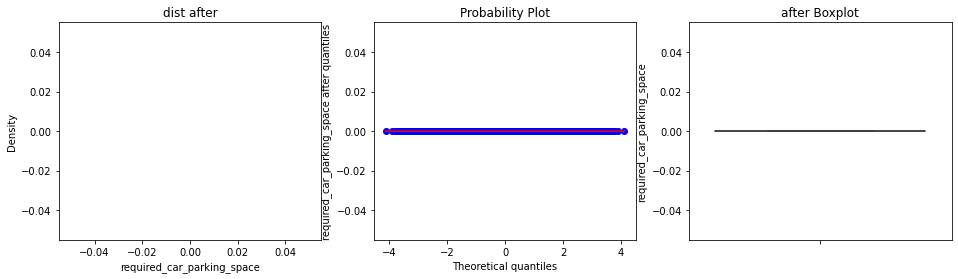

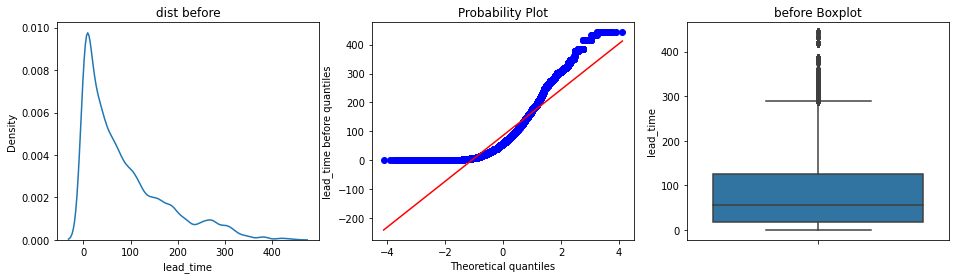

Upper limit of lead_time 289.5
Lower limit of lead_time -146.5


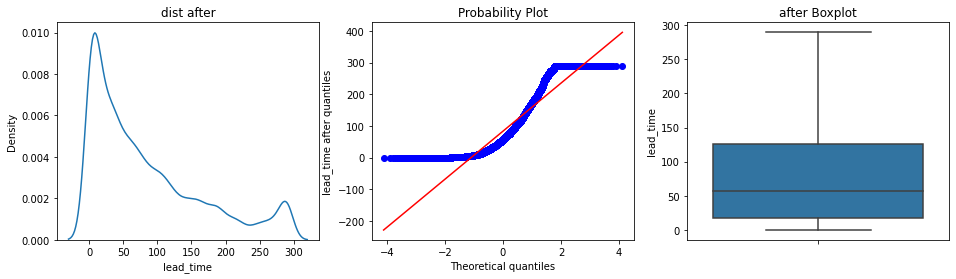

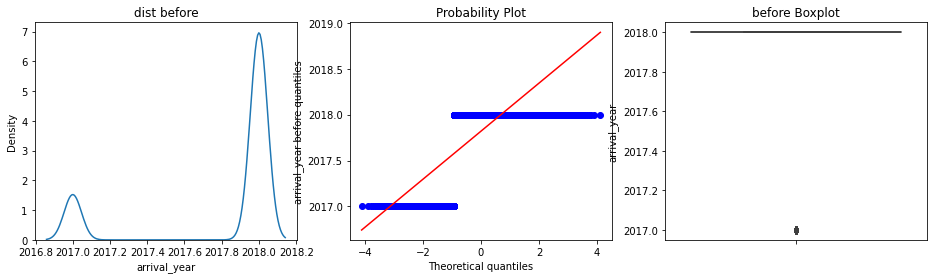

Upper limit of arrival_year 2018.0
Lower limit of arrival_year 2018.0


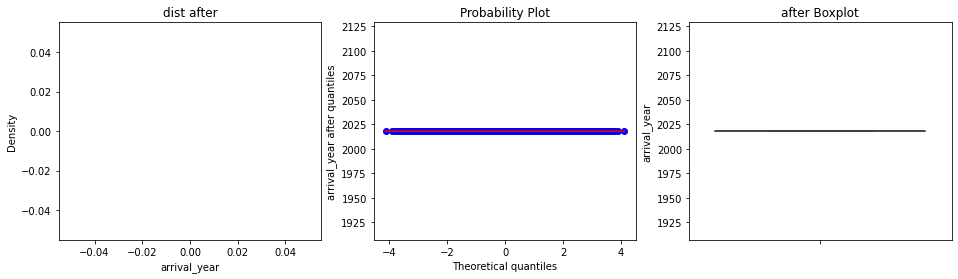

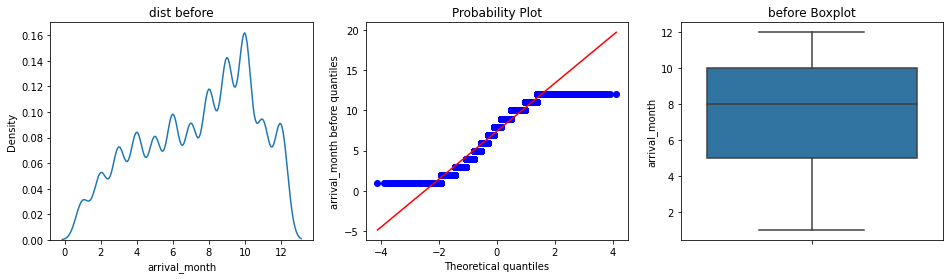

Upper limit of arrival_month 17.5
Lower limit of arrival_month -2.5


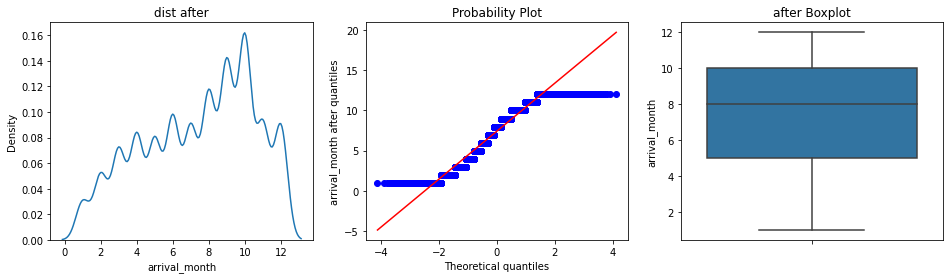

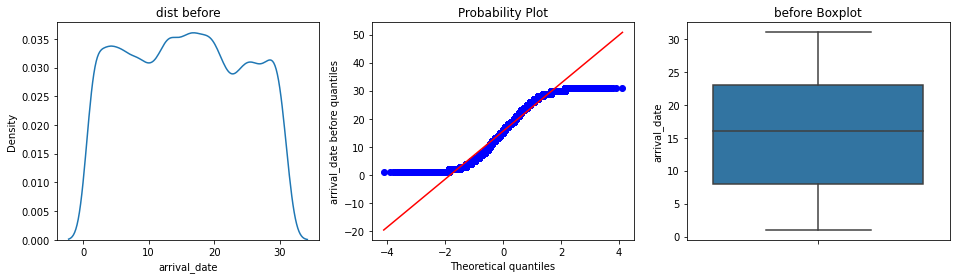

Upper limit of arrival_date 45.5
Lower limit of arrival_date -14.5


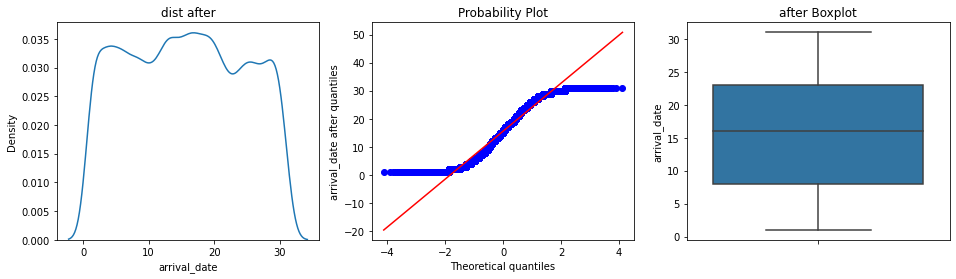

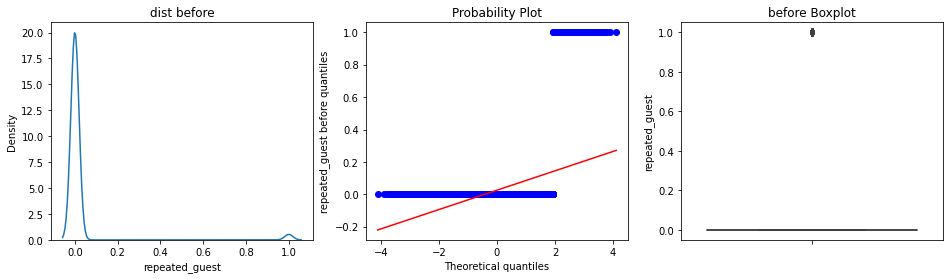

Upper limit of repeated_guest 0.0
Lower limit of repeated_guest 0.0


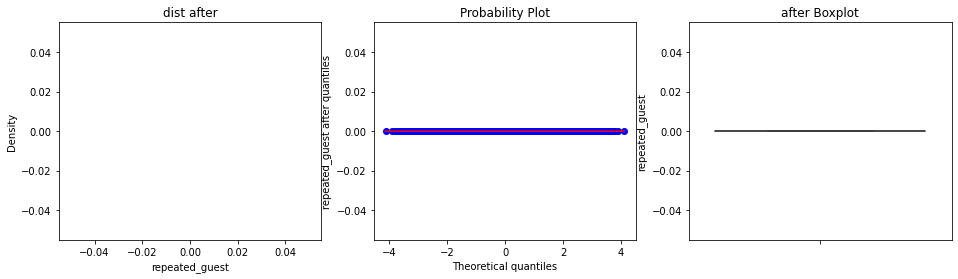

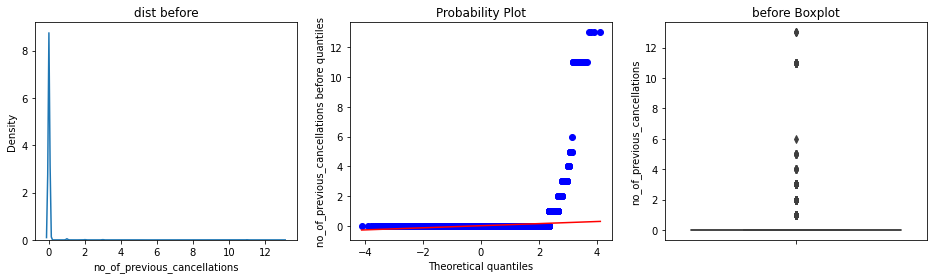

Upper limit of no_of_previous_cancellations 0.0
Lower limit of no_of_previous_cancellations 0.0


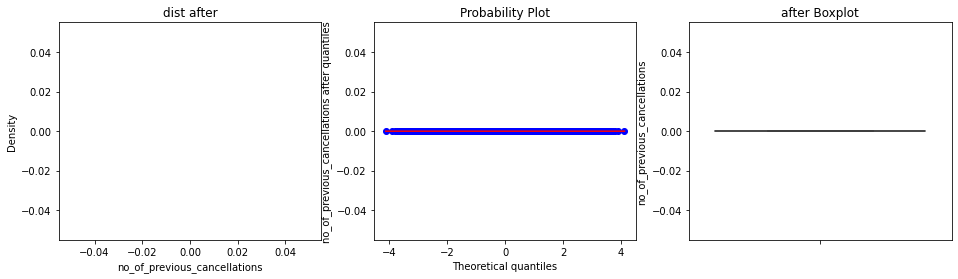

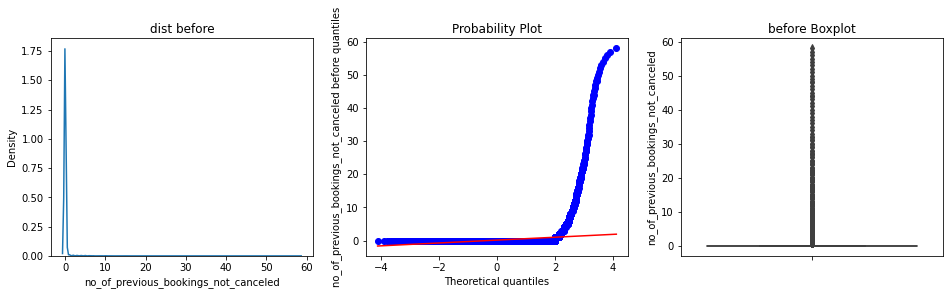

Upper limit of no_of_previous_bookings_not_canceled 0.0
Lower limit of no_of_previous_bookings_not_canceled 0.0


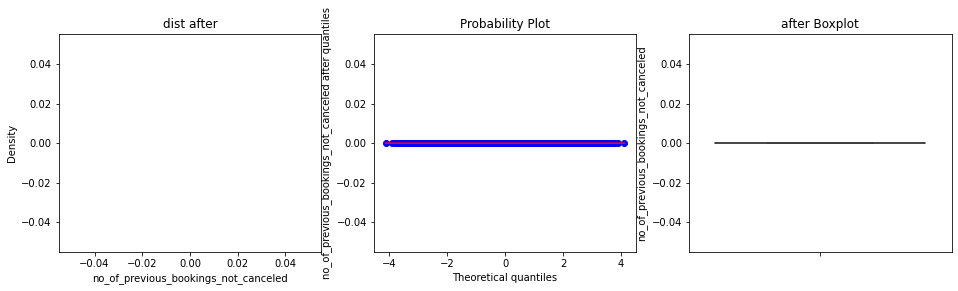

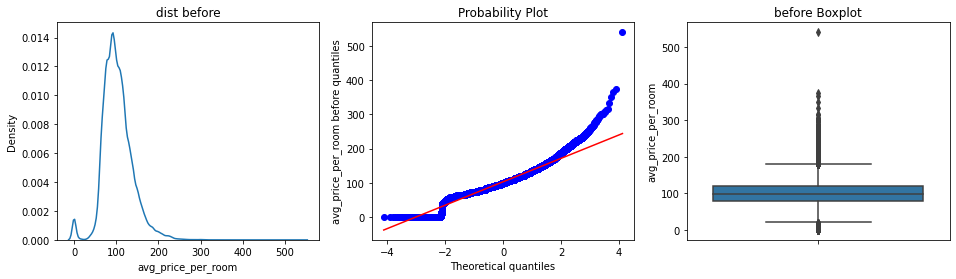

Upper limit of avg_price_per_room 179.55
Lower limit of avg_price_per_room 20.749999999999993


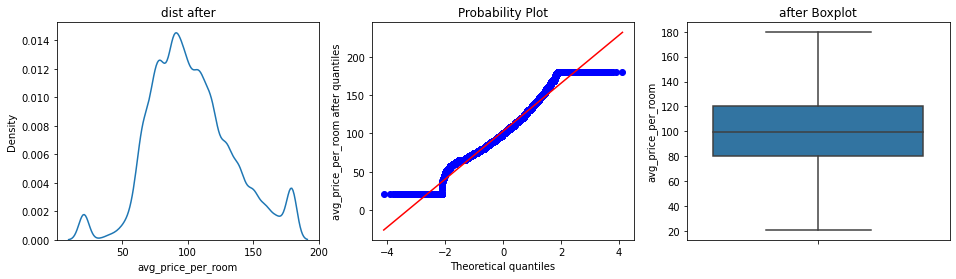

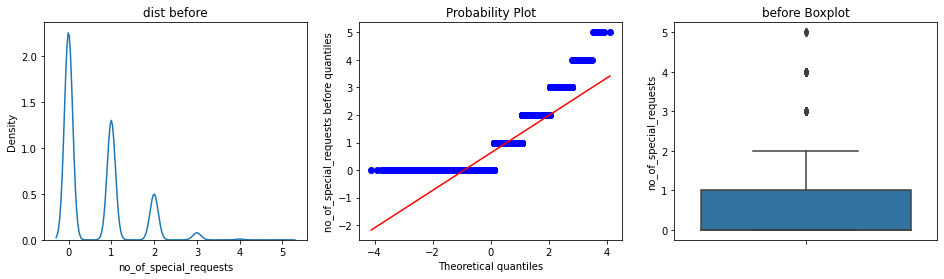

Upper limit of no_of_special_requests 2.5
Lower limit of no_of_special_requests -1.5


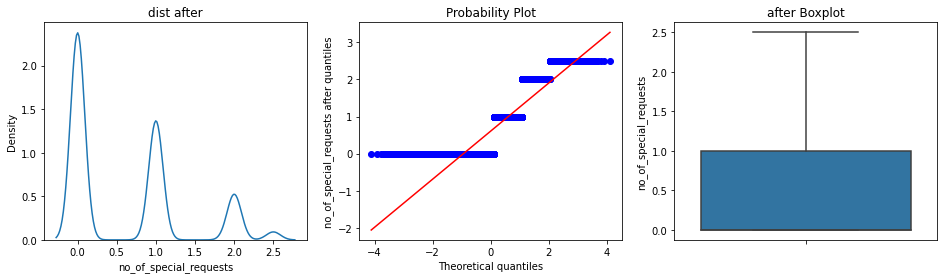

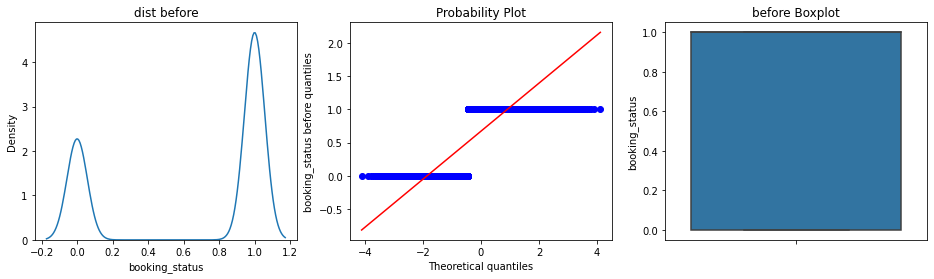

Upper limit of booking_status 2.5
Lower limit of booking_status -1.5


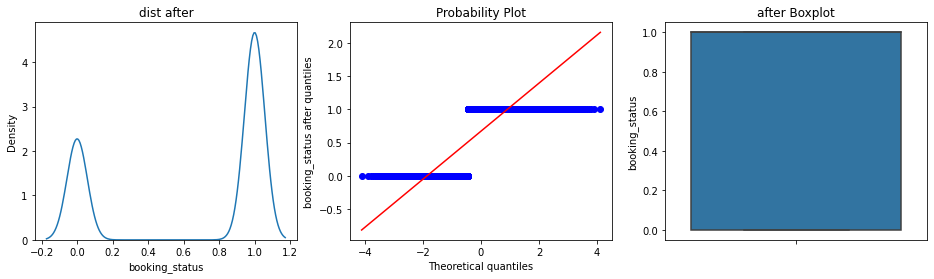

In [162]:
for feature in numericFeature:
    handlingOuliersIQR(feature)  

In [163]:
def handlingOuliersIQR_(df,feature):
    percentile25 = df[feature].quantile(0.25)
    percentile75 = df[feature].quantile(0.75)
    
    iqr = percentile75 - percentile25
    
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    
    print(f"Upper limit of {feature}",upper_limit)
    print(f"Lower limit of {feature}",lower_limit)
    
    df[feature]= np.where(df[feature] > upper_limit, upper_limit,
                       np.where(df[feature] < lower_limit, lower_limit, df[feature]))

In [167]:
features_having_outliers = ['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','required_car_parking_space','lead_time','arrival_year','arrival_month','arrival_date','repeated_guest','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']

In [171]:
for feature in features_having_outliers:
  handlingOuliersIQR_(X_train,feature)
  handlingOuliersIQR_(X_test,feature)

Upper limit of no_of_adults 2.0
Lower limit of no_of_adults 2.0
Upper limit of no_of_adults 2.0
Lower limit of no_of_adults 2.0
Upper limit of no_of_children 0.0
Lower limit of no_of_children 0.0
Upper limit of no_of_children 0.0
Lower limit of no_of_children 0.0
Upper limit of no_of_weekend_nights 5.0
Lower limit of no_of_weekend_nights -3.0
Upper limit of no_of_weekend_nights 5.0
Lower limit of no_of_weekend_nights -3.0
Upper limit of no_of_week_nights 6.0
Lower limit of no_of_week_nights -2.0
Upper limit of no_of_week_nights 6.0
Lower limit of no_of_week_nights -2.0
Upper limit of required_car_parking_space 0.0
Lower limit of required_car_parking_space 0.0
Upper limit of required_car_parking_space 0.0
Lower limit of required_car_parking_space 0.0
Upper limit of lead_time 18.62062973927477
Lower limit of lead_time -4.142264630496351
Upper limit of lead_time 17.97185074316506
Lower limit of lead_time -4.059611146116205
Upper limit of arrival_year 2018.0
Lower limit of arrival_year 201

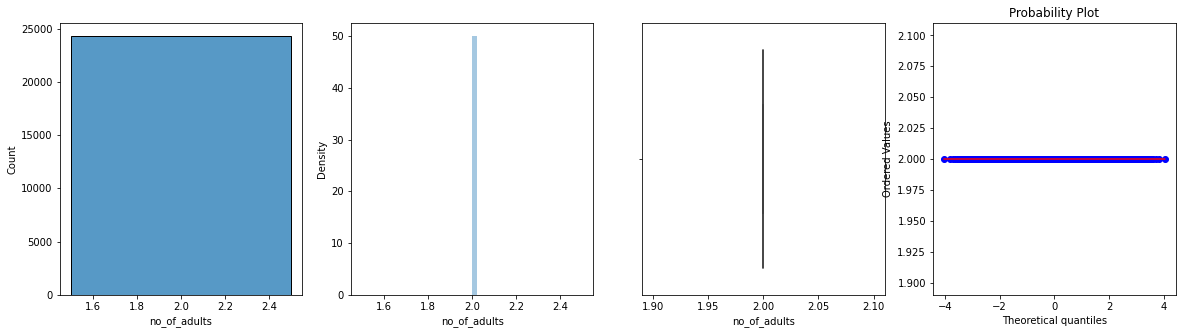

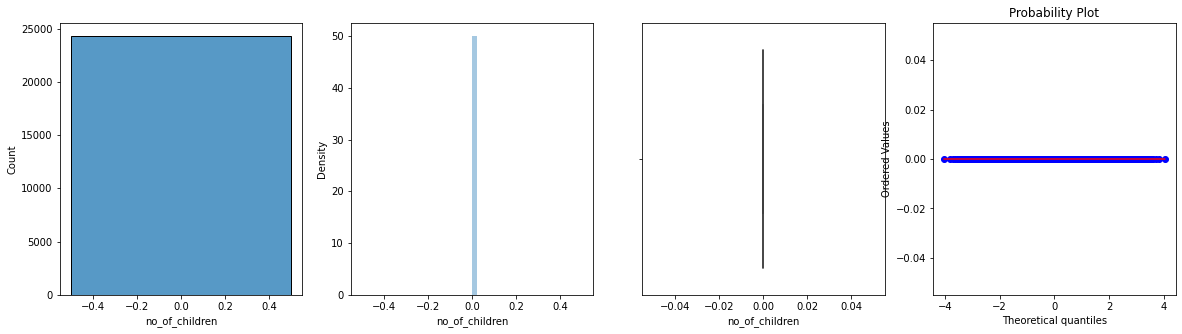

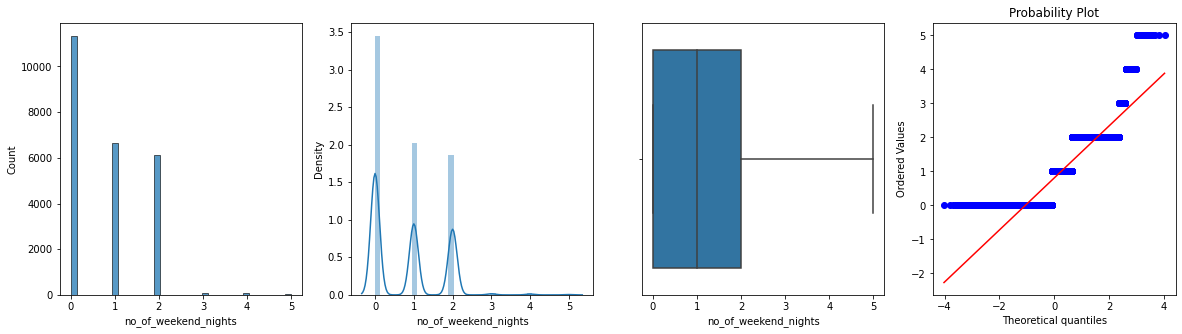

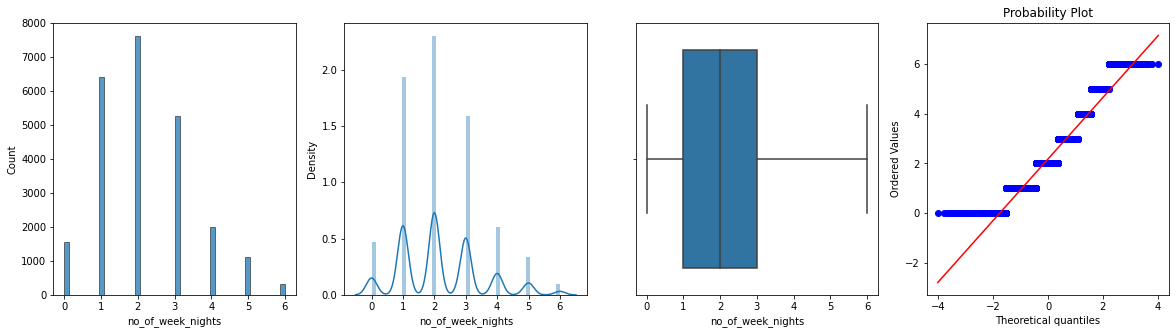

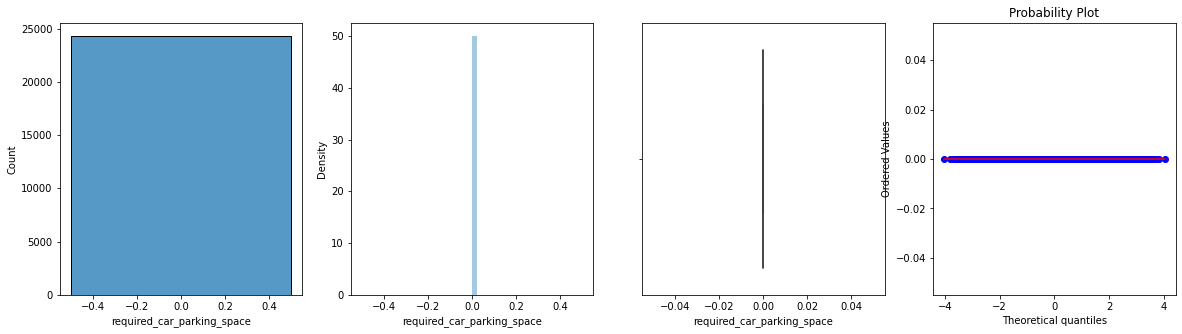

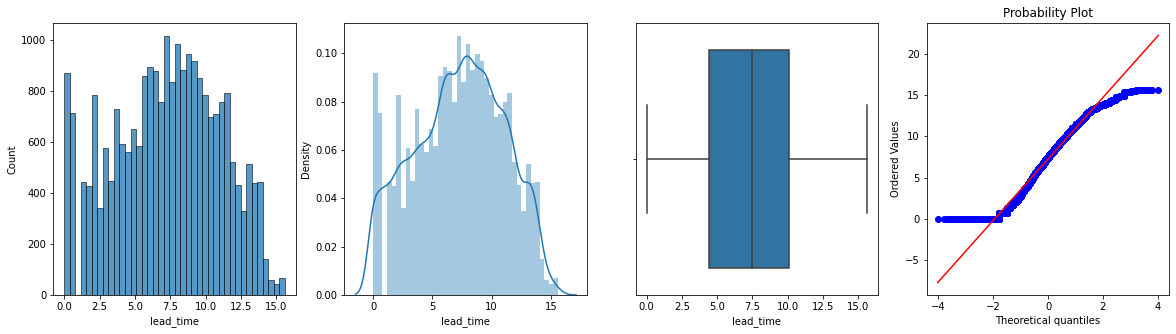

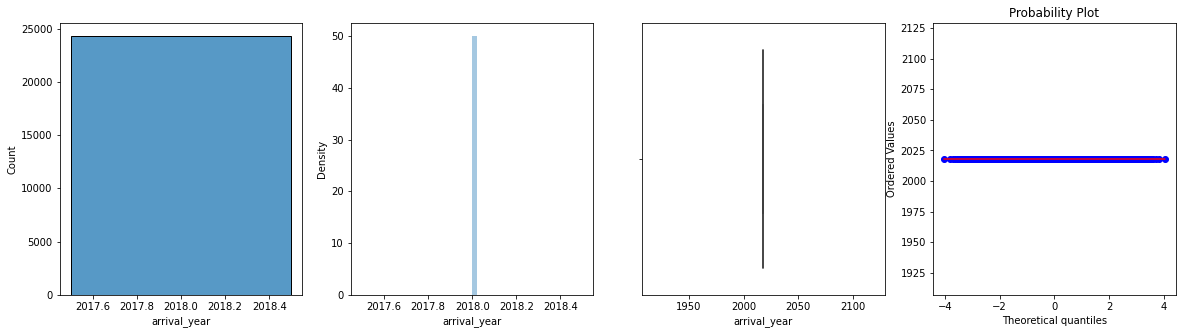

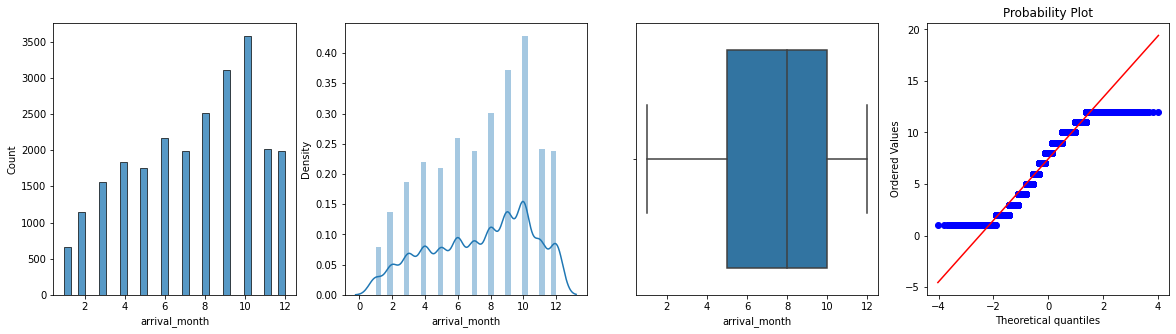

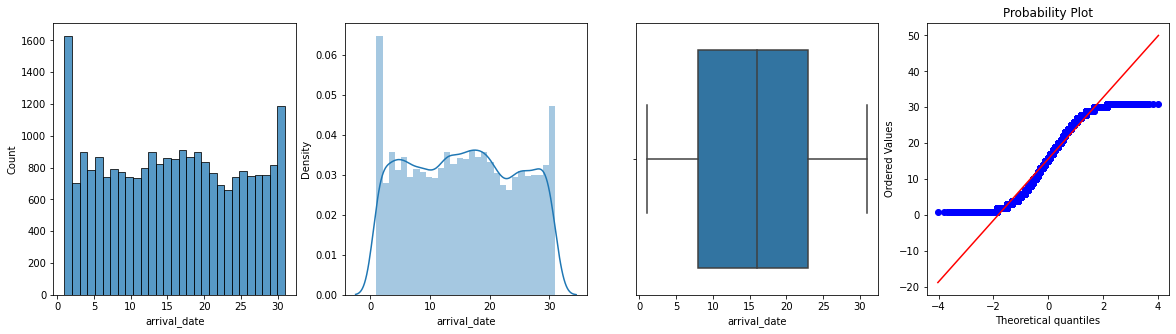

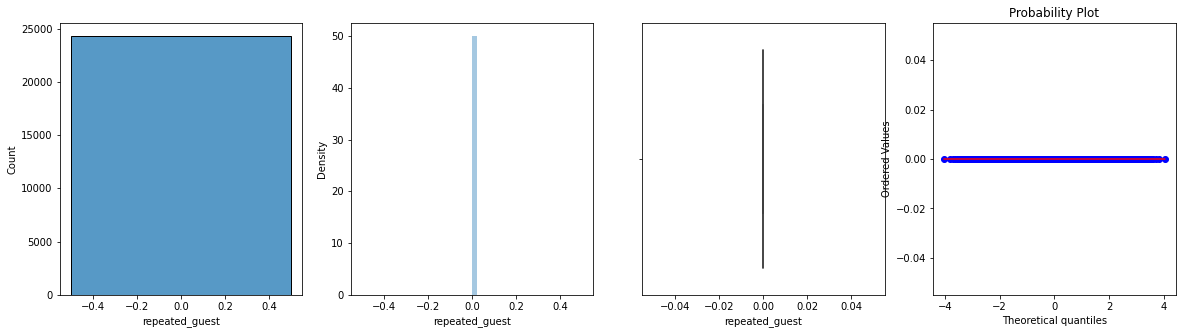

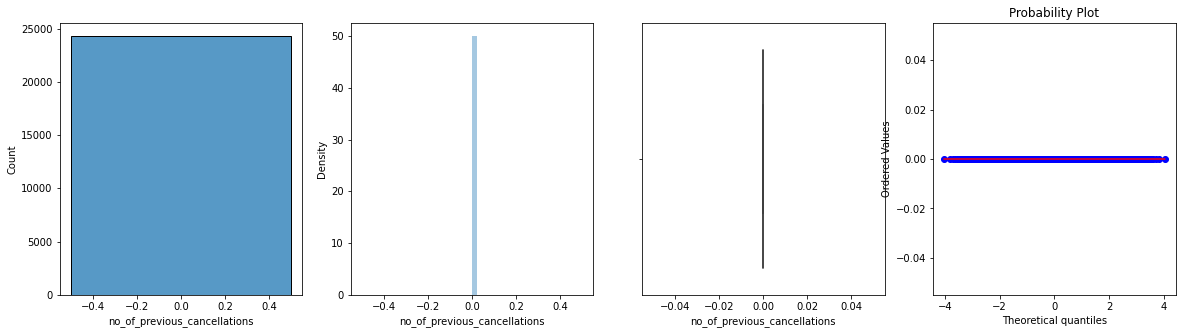

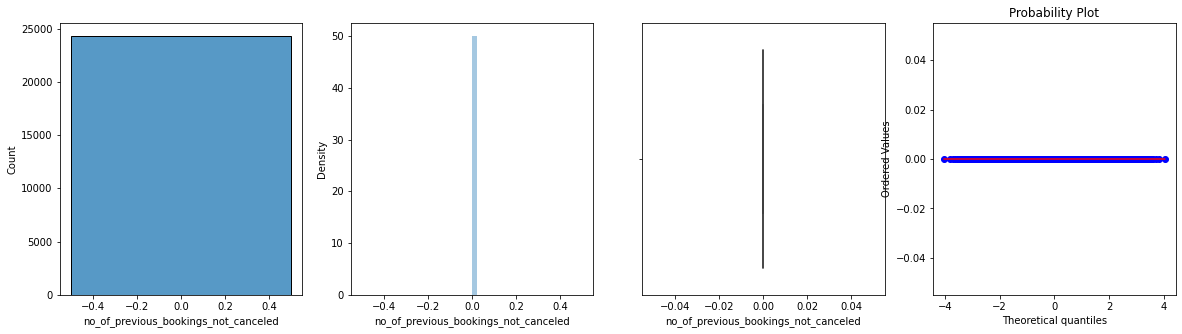

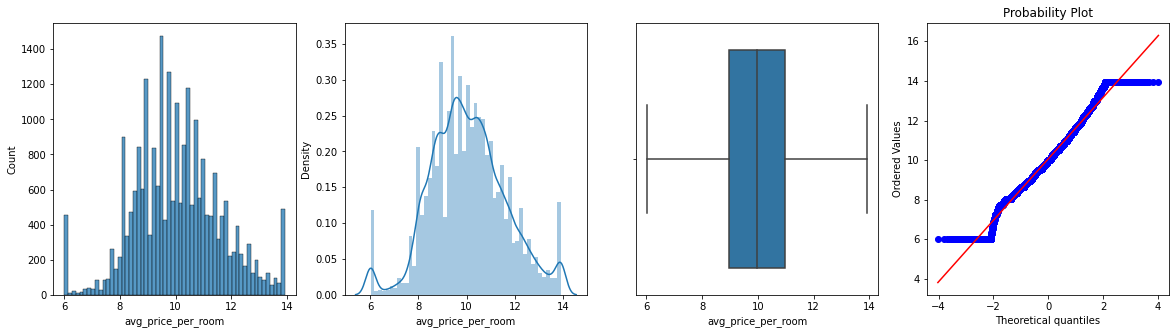

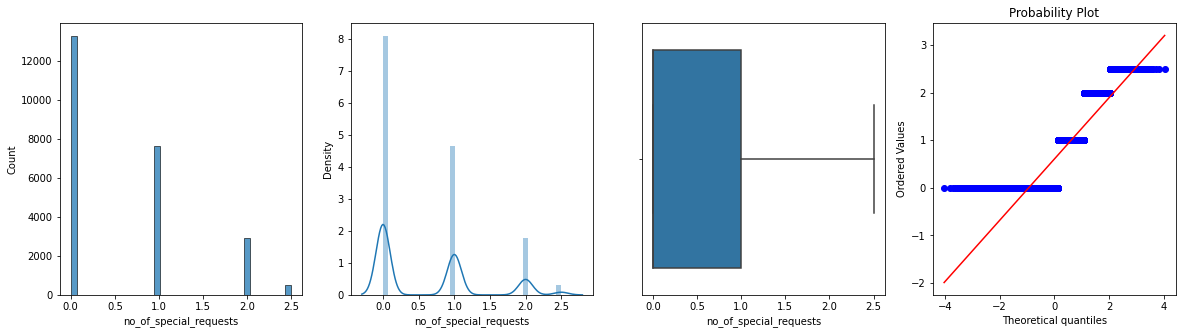

In [172]:
for feature in features_having_outliers:
  fig, ax = plt.subplots(1,4,figsize=(20, 5))
  sns.histplot(X_train[feature], ax=ax[0])
  sns.distplot(X_train[feature], ax=ax[1])
  sns.boxplot(X_train[feature],ax=ax[2])
  sp.probplot(X_train[feature], plot=ax[3], fit=True)
  fig.show()

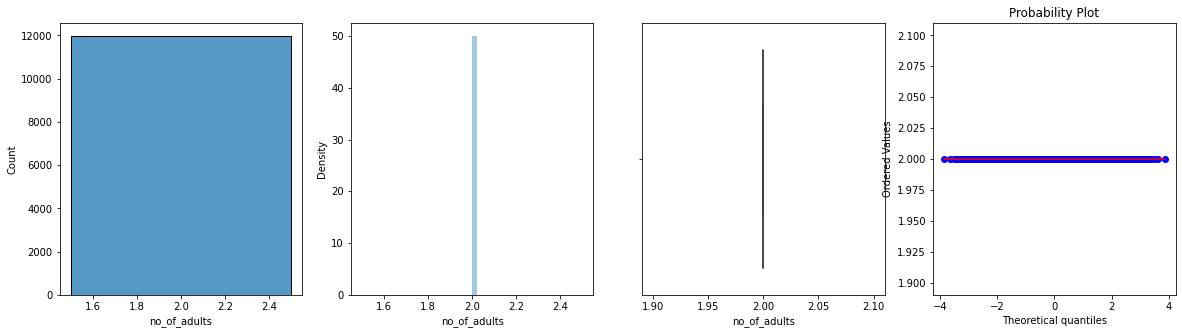

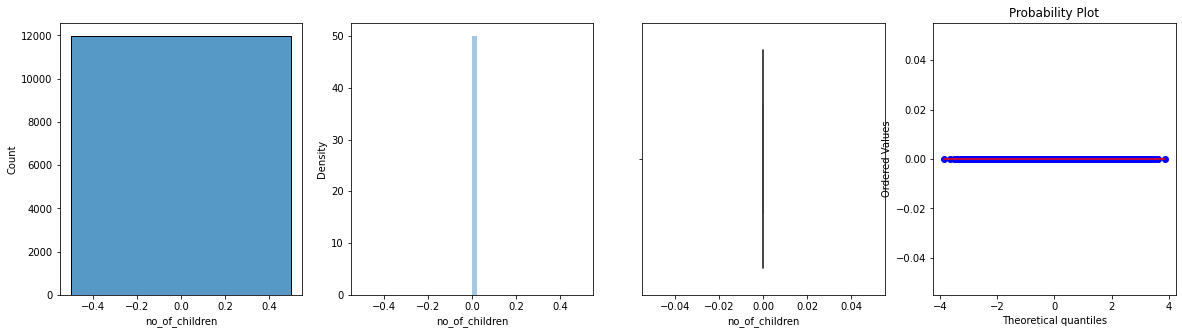

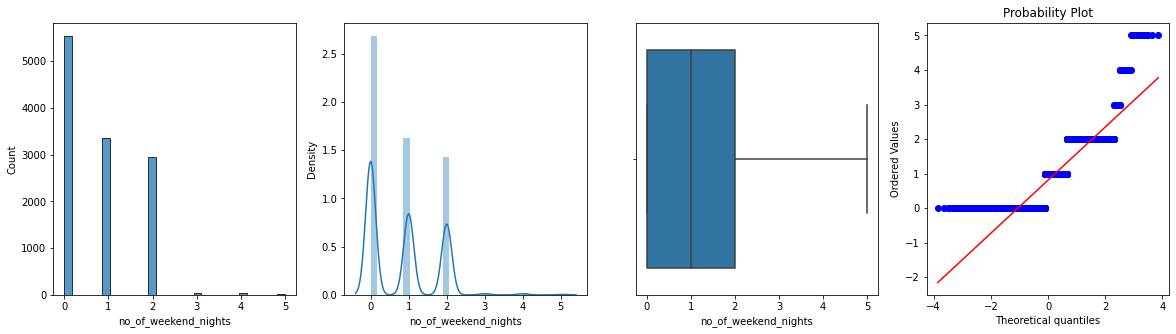

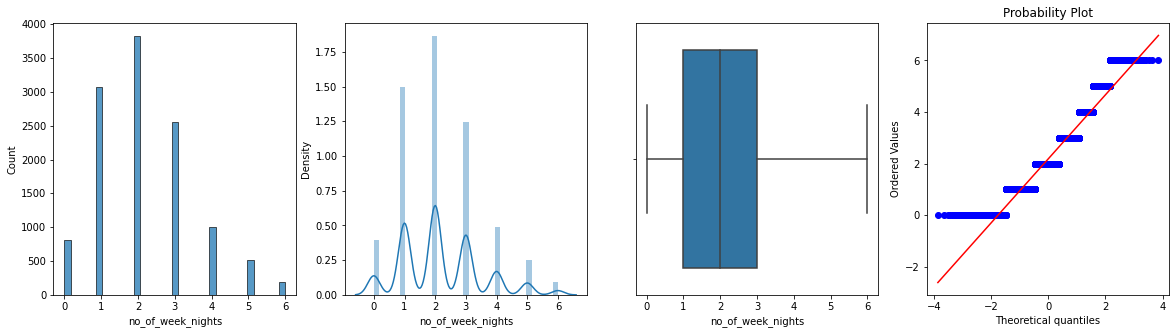

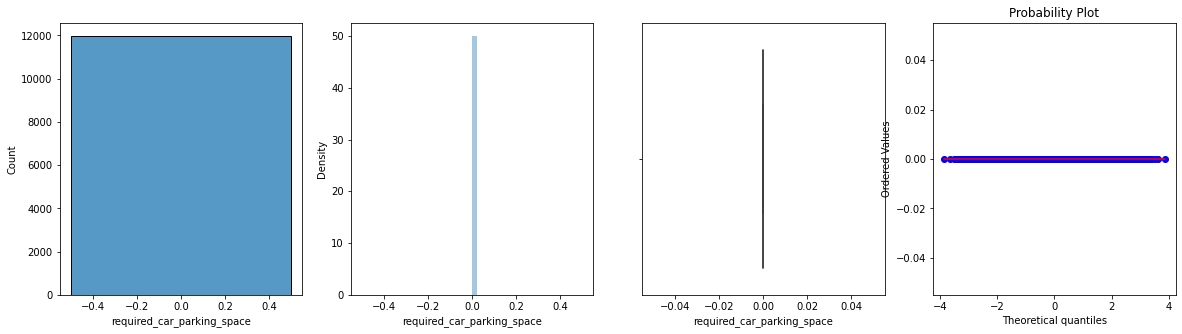

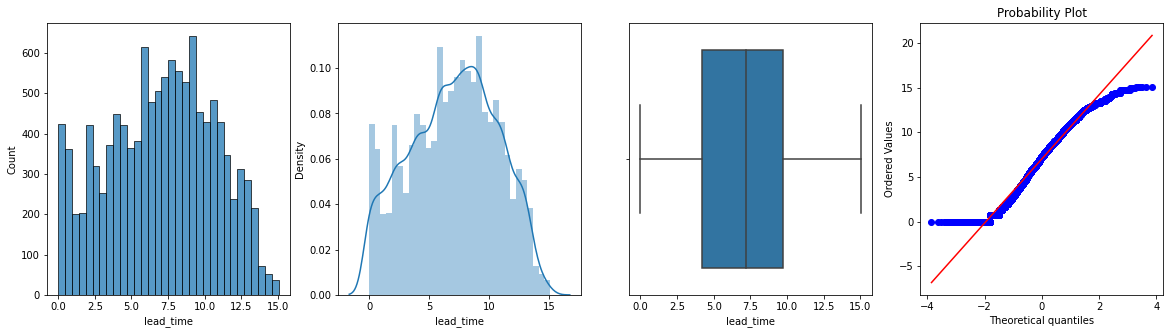

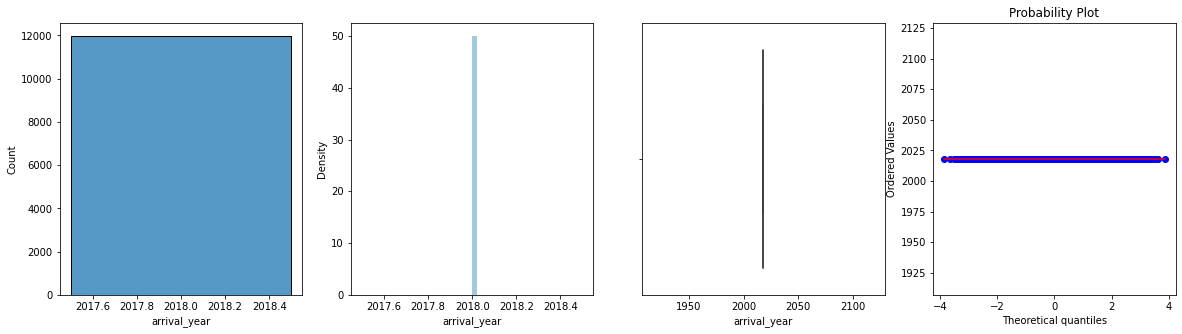

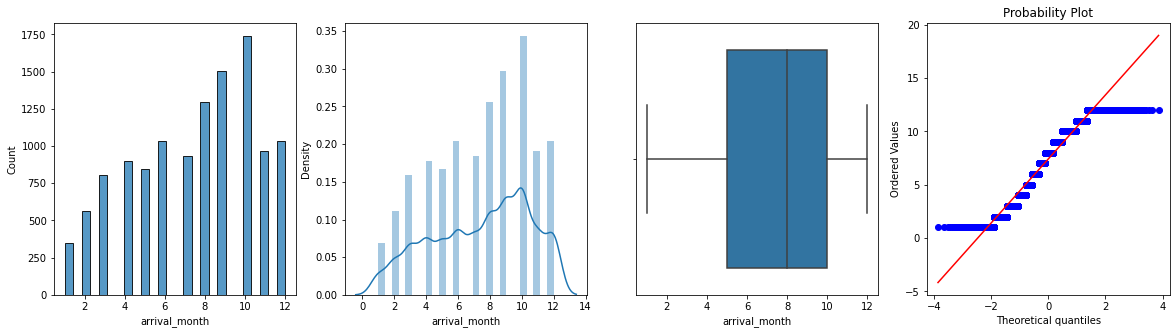

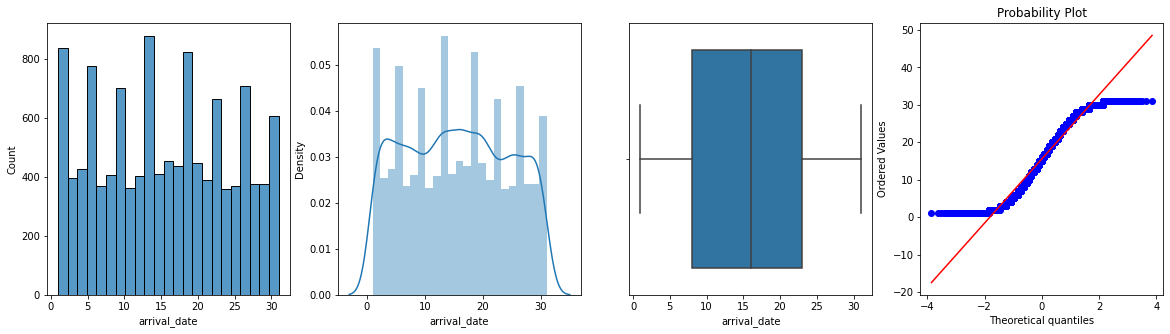

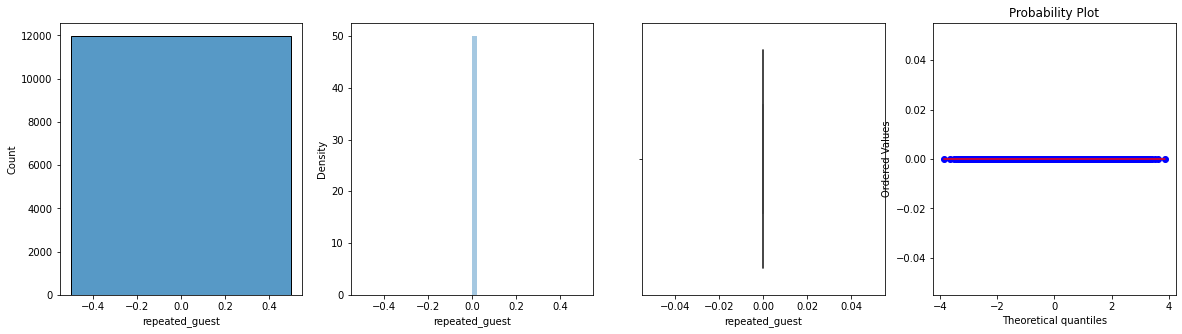

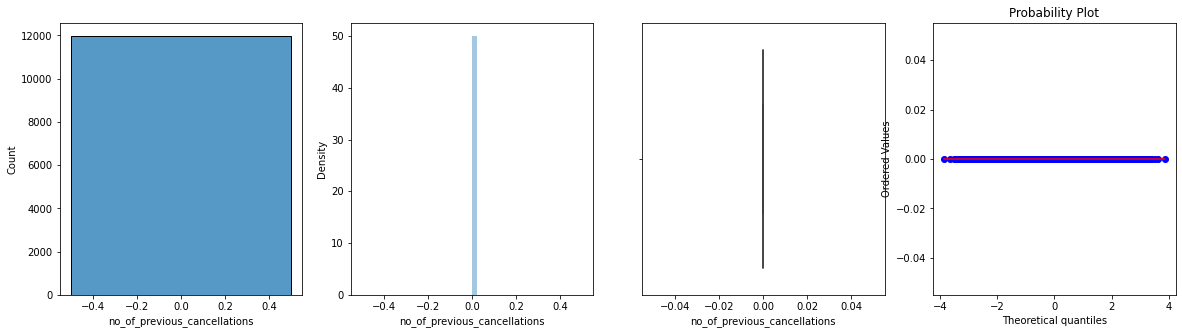

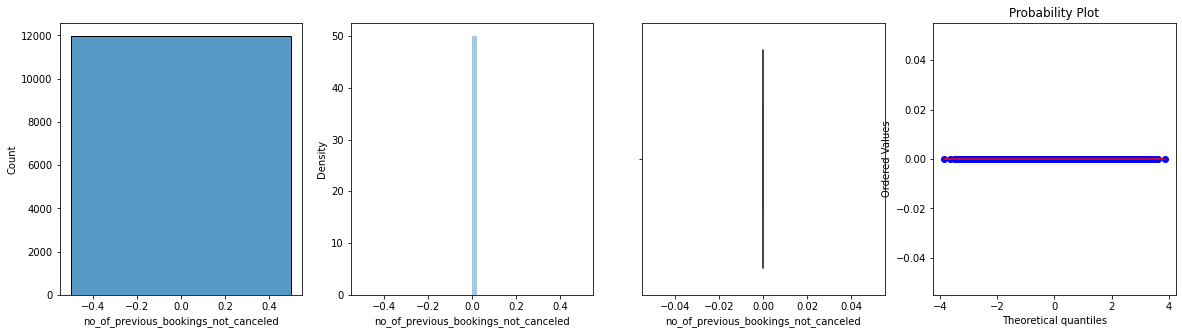

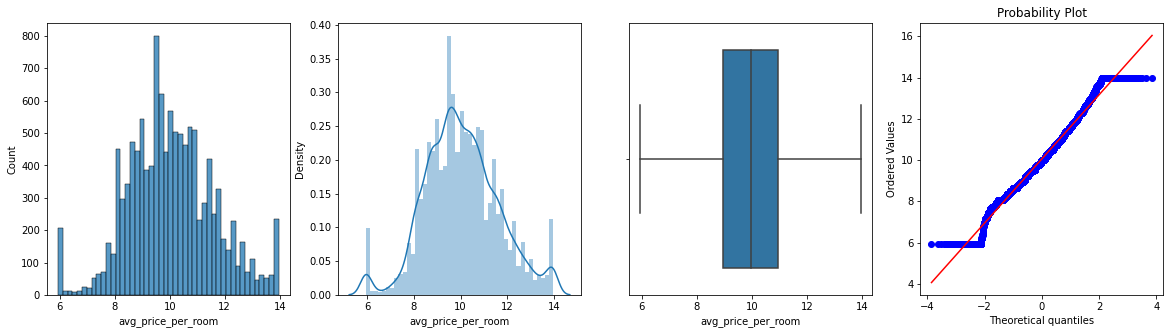

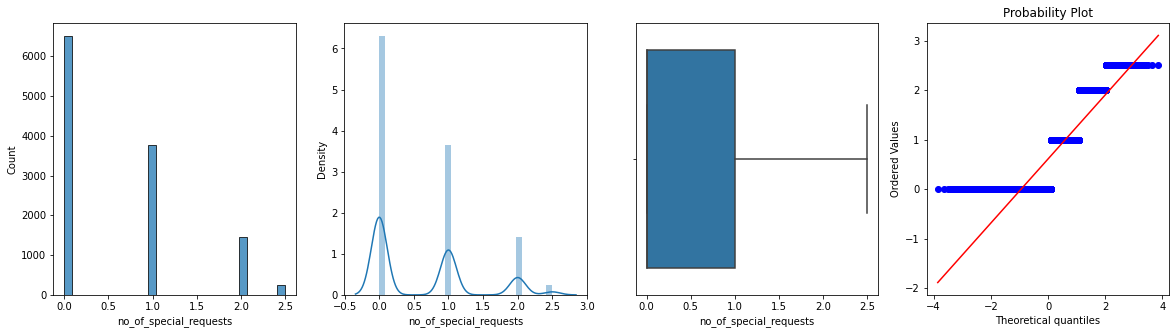

In [173]:
for feature in features_having_outliers:
  fig, ax = plt.subplots(1,4,figsize=(20, 5))
  sns.histplot(X_test[feature], ax=ax[0])
  sns.distplot(X_test[feature], ax=ax[1])
  sns.boxplot(X_test[feature],ax=ax[2])
  sp.probplot(X_test[feature], plot=ax[3], fit=True)
  fig.show()

### Scaling

In [174]:
from sklearn.preprocessing import StandardScaler

In [175]:
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [176]:
from sklearn.linear_model import LogisticRegression

In [178]:
lr = LogisticRegression().fit(X_train,y_train)

In [179]:
pred = lr.predict(X_test)

In [196]:
from sklearn.metrics import balanced_accuracy_score,recall_score,precision_score,roc_auc_score,roc_curve,confusion_matrix,plot_roc_curve,classification_report

In [181]:
balanced_accuracy_score(y_test,pred)

0.7533186237475814

In [184]:
confusion_matrix(y_test,pred)

array([[2393, 1568],
       [ 781, 7229]])

In [185]:
recall_score(y_test,pred)

0.9024968789013733

In [186]:
precision_score(y_test,pred)

0.8217574173013528

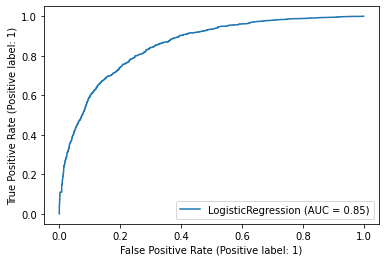

In [193]:
plot_roc_curve(lr,X_test,y_test)

In [194]:
def dominance(y_true, y_pred):
    tpr = recall_score(y_true, y_pred, pos_label=1)
    tnr = recall_score(y_true, y_pred, pos_label=0)
    print(tpr,tnr)
    return tpr - tnr

In [195]:
print('Dominance test:', dominance(y_test,pred))

0.9024968789013733 0.6041403685937895
Dominance test: 0.2983565103075838


In [198]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67      3961
           1       0.82      0.90      0.86      8010

    accuracy                           0.80     11971
   macro avg       0.79      0.75      0.77     11971
weighted avg       0.80      0.80      0.80     11971

